# i. Perkenalan

**Nama: Hanifah**

**Batch: HCK-004**

---



## Problem Statement 
Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.




## Objective

membangun model prediksi churn yang akurat dengan menggunakan dataset yang diberikan, dengan tujuan meminimalkan resiko seorang customer untuk berhenti menggunakan produk yang ditawarkan oleh perusahaan.

Berikut beberapa poin yang bisa menjadi sub-objective dalam mencapai tujuan tersebut:

`1.` Mengumpulkan dan memproses data dengan baik agar dapat digunakan sebagai input dalam model prediksi churn.

`2.` Membuat model Deep learning yang tepat untuk memprediksi customer churn berdasarkan variabel yang relevan dalam dataset.
Melakukan evaluasi kinerja model dan optimasi parameter untuk meningkatkan akurasi prediksi.

`3.` Menerapkan model prediksi pada data customer baru untuk mengidentifikasi customer yang berisiko churn dan mengambil tindakan preventif untuk mempertahankan mereka sebagai pelanggan.

`4.` Dengan mengoptimalkan model prediksi churn, perusahaan dapat meminimalkan resiko kehilangan pelanggan yang dapat berdampak negatif pada pertumbuhan bisnis dan keuntungan jangka panjang.




# ii. Import Library

In [1]:
!pip install feature-engine
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#untuk model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model, load_model
# from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.initializers import Zeros

#preprocessing
from phik import phik_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


#evaluasi
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

import pickle
import joblib

import warnings
warnings.filterwarnings(action='ignore')

# iii. Data Loading

In [3]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--",'n/a','NaN','?']
df = pd.read_csv('h8dsft_P2M1_Hanifah.csv',na_values = missing_values)
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# Menampilkan 5 data atas
df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [5]:
# Menampilkan 5 data bawah
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [6]:
# Melihat berapa jumlah kolom dan baris
df.shape

(37010, 22)

* Data terdiri dari 37010 baris dan 22 kolom

In [7]:
# Mencari data duplikasi
df[df.duplicated()].shape

(18, 22)

- Terdapat 18 duplicat value

In [8]:
# Drop dulicate
df.drop_duplicates(inplace=True)

In [9]:
# cek kembali data duplikasi
df[df.duplicated()].shape

(0, 22)

In [10]:
# Menampilkan dataset teratas
pd.set_option("display.max.columns",None)
df.head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [11]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

In [12]:
# Mengubah dtype pada datetime
df['joining_date'] = pd.to_datetime(df['joining_date'])
# Mengubah dtype pada time
df['last_visit_time'] = pd.to_datetime(df['last_visit_time']).dt.time

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       36992 non-null  object        
 1   age                           36992 non-null  int64         
 2   gender                        36933 non-null  object        
 3   region_category               31564 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       31554 non-null  object        
 7   preferred_offer_types         36704 non-null  object        
 8   medium_of_operation           31599 non-null  object        
 9   internet_option               36992 non-null  object        
 10  last_visit_time               36992 non-null  object        
 11  days_since_last_login       

In [14]:
# Mencari missing value
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

- Terdapat beberapa kolom yang missing di antaranya :
    * Kolom gender
    * Kolom region_category
    * Kolom joined_through_referral
    * Kolom preferred_offer_types
    * Kolom medium_of_operation
    
- Dalam hal ini akan di lakukan pengecekan percentage dari masing-masing kolom mising value tersebut mengacu terhadap:

    * MAR (Missing At Random) berarti bahwa kemungkinan terjadinya data yang hilang bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang secara acak, tetapi kemungkinan terjadi karena hubungannya dengan data yang tersedia dalam dataset.
    * MNAR (Missing Not At Random) berarti bahwa kemungkinan terjadinya data yang hilang tidak bergantung pada data yang tersedia dalam dataset. Dalam hal ini, data yang hilang tidak dihasilkan secara acak dan tidak dapat dianggap sebagai bagian dari sampel. Oleh karena itu, analisis statistik harus memperhitungkan dampak data yang hilang dalam hasil akhir.


In [15]:
# Mencari letak missing value pada price
df.loc[df['region_category'].isnull()].head(2)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [16]:
#Looping untuk mencari % missing value
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"Persent missing value",':',df[i].isnull().sum()*100/df.shape[0],"%",df[i].dtype)

gender Persent missing value : 0.1594939446366782 % object
region_category Persent missing value : 14.673442906574394 % object
joined_through_referral Persent missing value : 14.700475778546712 % object
preferred_offer_types Persent missing value : 0.7785467128027682 % object
medium_of_operation Persent missing value : 14.57882785467128 % object


* Kolom gender dan kolom preferred_offer_types cenderung memiliki sedikit persentage missing value yaitu di 0.15 % dan 0.77% maka akan di putuskan untuk dilakukan drop kolom missing value
* Kolom region_category, kolom joined_through_referral dan kolom medium_of_operation memiliki persentase yang tinggi tehadap missing value yaitu 14%, dalam hal ini tidak di putuskan untuk melakukan drop pada kolom tersebut di karenakan percentage yang besar akan mempengaruhi dataset yang ada jika di lakuakn drop kolom.

In [17]:
# Menghapus baris yang memiliki missing value pada kolom gender dan kolom preferred_offer_types
df = df.dropna(subset=['gender','preferred_offer_types'])

In [18]:
# Menampilkan jumlah missing value pada kolom gender setelah dihapus
null_counts = df['gender'].isnull().sum()
print(f"Jumlah missing value pada kolom gender setelah dihapus: {null_counts}")

Jumlah missing value pada kolom gender setelah dihapus: 0


In [19]:
# Menampilkan jumlah missing value pada kolom preferred_offer_types setelah dihapus
null_counts = df['preferred_offer_types'].isnull().sum()
print(f"Jumlah missing value pada kolom preferred_offer_types setelah dihapus: {null_counts}")

Jumlah missing value pada kolom preferred_offer_types setelah dihapus: 0


In [20]:
# Mengisi missing value dengan modus pada ketiga kolom
df['region_category'] = df['region_category'].fillna(df['region_category'].mode().iloc[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode().iloc[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode().iloc[0])

# Menampilkan kembali jumlah missing value pada ketiga kolom setelah diisi
null_counts = df[['region_category', 'joined_through_referral', 'medium_of_operation']].isnull().sum()
print(f"Jumlah missing value pada kolom region_category setelah diisi: {null_counts['region_category']}")
print(f"Jumlah missing value pada kolom joined_through_referral setelah diisi: {null_counts['joined_through_referral']}")
print(f"Jumlah missing value pada kolom medium_of_operation setelah diisi: {null_counts['medium_of_operation']}")

Jumlah missing value pada kolom region_category setelah diisi: 0
Jumlah missing value pada kolom joined_through_referral setelah diisi: 0
Jumlah missing value pada kolom medium_of_operation setelah diisi: 0


# IV. Exploratory Data Analysis (EDA)

In [21]:
# Mencari informasi datetime
df.joining_date.describe()

count                   36646
unique                   1096
top       2015-06-02 00:00:00
freq                       55
first     2015-01-01 00:00:00
last      2017-12-31 00:00:00
Name: joining_date, dtype: object

- Data information dari 2015 June 02 - 2017 Dec 31

In [22]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
age,36646.000000,37.115511,15.871279,10.000000,23.000000,37.000000,51.000000,64.000000
days_since_last_login,36646.000000,-41.955957,228.913891,-999.000000,8.000000,12.000000,16.000000,26.000000
avg_time_spent,36646.000000,279.118857,329.850217,0.000000,60.087500,161.770000,356.352500,3235.578521
avg_transaction_value,36646.000000,29276.226579,19448.891993,800.460000,14177.835000,27563.715000,40860.437500,99914.050000
avg_frequency_login_days,36646.000000,14.655780,9.471645,0.000000,7.000000,14.000000,22.000000,73.061995
points_in_wallet,36646.000000,623.646095,270.163457,0.000000,574.212500,680.415000,757.037500,2069.069761
churn_risk_score,36646.000000,0.541041,0.498320,0.000000,0.000000,1.000000,1.000000,1.000000


- rata-rata pengguna platform ini di umur 37 -64 tahun
- Rata-rata waktu yang dihabiskan pengguna saat menggunakan layanan 279 menit dan maksimal di 3235 menit
- Rata-rata nilai transaksi yang dilakukan oleh pengguna 29276 dan maksimal nya di 99914
- Rata-rata jumlah hari antara login pengguna ke layanan 14 kali/hari maksimalnya bisa sampai 73 kali
- Jumlah poin yang dimiliki pengguna di dalam dompet virtual mereka rata rata terdapat 623 dan palingtinggi 2069
- churn_risk_score: Skor risiko churn (berhenti menggunakan layanan) untuk pengguna tersebut.(the target prediction)

In [23]:
df.gender.value_counts()

F    18348
M    18298
Name: gender, dtype: int64

* Terlihat bahwa total jenis kelamin wanita (18348) lebih banyak daripada laki-laki(18298).

In [24]:
# Mengelompokan kolom name dengan kolom price untuk dihitung jumlah datanya
df.groupby(['membership_category'])[['points_in_wallet']].aggregate(['mean'],ascending=True).reset_index()

,membership_category,points_in_wallet
,,mean
0,Basic Membership,564.432673
1,Gold Membership,657.508787
2,No Membership,562.358914
3,Platinum Membership,688.952893
4,Premium Membership,686.753710
5,Silver Membership,645.988049


* Terlihat pada tabel diatas bahwa rata-rata pengguna memiliki member tertingi adalah basic member rata-rata 0,9 dan jumlah 7648

In [25]:
# Mengelompokan kolom name dengan kolom price untuk dihitung jumlah datanya
df.groupby('internet_option')[['churn_risk_score']].aggregate(['mean','count']).reset_index()

internet_option churn_risk_score       
                              mean  count
0     Fiber_Optic         0.545320  12125
1     Mobile_Data         0.542229  12231
2           Wi-Fi         0.535639  12290

* Terlihat bahwa inernet option yang di gunakan pelanggan relatif sama antara menggunakan Fiber_Optic (12125), Mobile_Data(12231) dan Wi-fi(12290)

In [26]:
# Mengelompokan kolom name dengan kolom price untuk dihitung jumlah datanya
df.groupby('feedback')[['churn_risk_score']].aggregate(['mean','count']).reset_index()

feedback churn_risk_score      
                                        mean count
0       No reason specified         0.635239  6226
1     Poor Customer Service         0.639379  6181
2      Poor Product Quality         0.649190  6294
3              Poor Website         0.632561  6216
4  Products always in Stock         0.000000  1368
5     Quality Customer Care         0.000000  1351
6          Reasonable Price         0.000000  1408
7              Too many ads         0.627230  6221
8     User Friendly Website         0.000000  1381

* Terlihat bahwa feedback tidak puas sangat tinggi seperti Poor Customer Service(6181), Poor Product Quality(6294), Poor Website(6216), Too many ads(6221)

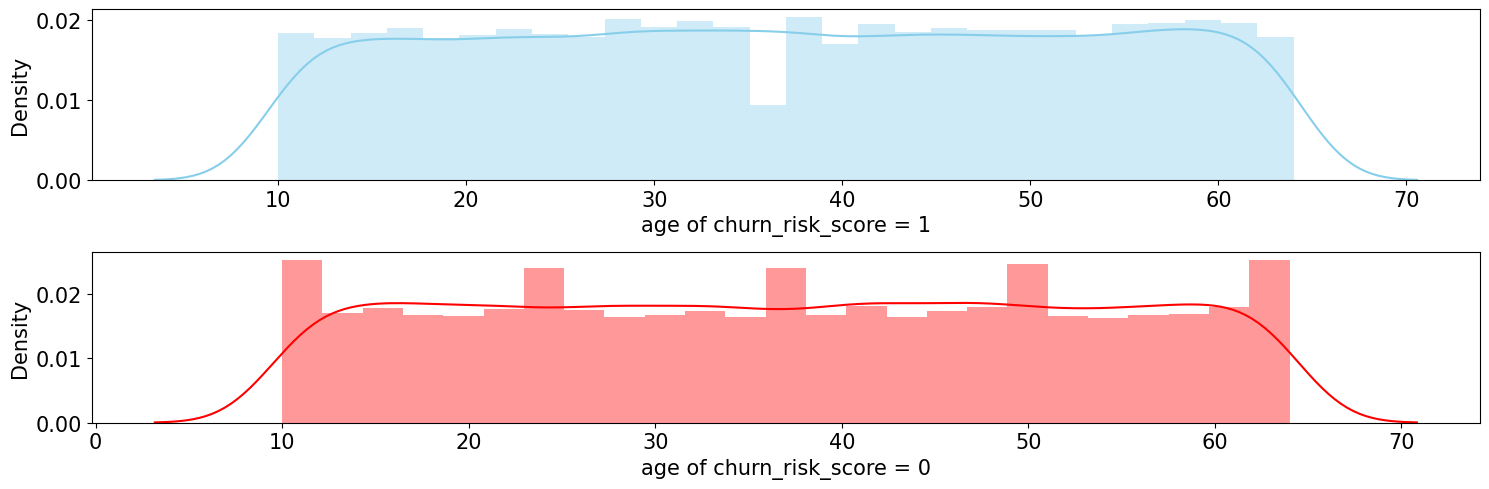

In [27]:
plt.figure(figsize=[15,5]) #mengatur ukuran gambar (25 x 10) dalam satuan inch
plt.subplot(2,1,1) #membuat dua plot, satu di atas dan satu di bawah
b=sns.distplot(df[df['churn_risk_score']==1]['age'],color="skyblue") #histogram distribusi data dari kolom 'city_5g_ratio' dengan nilai 'is_5g' sama dengan 1. Histogram tersebut ditampilkan dengan warna biru langit ('skyblue').
b.set_xlabel("age of churn_risk_score = 1",fontsize=15)
b.set_ylabel("Density",fontsize=15)
b.tick_params(labelsize=15);
plt.subplot(2,1,2)
b=sns.distplot(df[df['churn_risk_score']==0]['age'],color="red")
b.set_xlabel("age of churn_risk_score = 0",fontsize=15)
b.set_ylabel("Density",fontsize=15)
b.tick_params(labelsize=15)
plt.tight_layout();

* Terdapat perbedaan yang signifikan dalam distribusi umur antara pelanggan yang memiliki risiko churn (churn_risk_score=1) dan pelanggan yang tidak memiliki risiko churn (churn_risk_score=0).
* Pelanggan yang memiliki risiko churn (churn_risk_score=1) cenderung memiliki distribusi umur yang lebih muda dibandingkan dengan pelanggan yang tidak memiliki risiko churn (churn_risk_score=0).
* Terdapat puncak yang lebih tinggi pada distribusi umur pelanggan yang tidak memiliki risiko churn (churn_risk_score=0) pada rentang usia 30-40 tahun, sedangkan pada distribusi umur pelanggan yang memiliki risiko churn (churn_risk_score=1) puncak tertinggi berada pada rentang usia 20-30 tahun.
* Pelanggan dengan rentang usia 20-30 tahun memiliki risiko churn yang lebih tinggi dibandingkan dengan rentang usia yang lebih tua.
* Pelanggan dengan rentang usia yang lebih tua cenderung memiliki risiko churn yang lebih rendah.

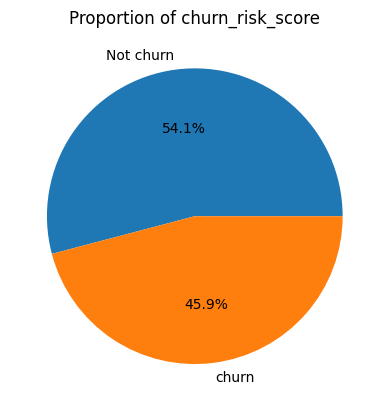

In [28]:
# Proporsi data target
default_counts = df['churn_risk_score'].value_counts()
plt.pie(default_counts, labels=['Not churn', 'churn'], autopct='%1.1f%%')
plt.title('Proportion of churn_risk_score')
plt.show()

* Data pada kolom target dapat dikatakan memiliki data yang balance karena proporsi dari data churn(45.9%) dan not churn (54.1%) perbedaan keduanya adalah 8% masih di bawah 10%

In [29]:
#membuat fungsi untuk plot 
def plotting_Profit(x:str,hue:str):    #ukuran plot diatur dengan menggunakan parameter figsize dengan method subplots
    try:
        fig, ax = plt.subplots(figsize=(26,8))
        colors = [
            "bubblegum pink", "sky blue"
            # "bright purple", "yellow"     
        ]
        
        ordering =df[x].value_counts()  # menggunakan method value_counts pada kolom x dari DataFrame df dan menghitung frekuensi setiap nilai unik di kolom x
        my_palette = sns.xkcd_palette(colors)
        sns.set_theme(style='whitegrid')
        sns.countplot(data=df, x=x, hue=hue,palette=my_palette, #mengatur urutan nilai di sumbu x berdasarkan urutan kategori pada list order
        order=ordering.sort_values(ascending=True).index, # mengurutkan nilai di sumbu x secara menaik berdasarkan jumlahnya.
        )
        ax.tick_params(axis='x', rotation=45) #sumbu x diputar 45 derajat agar lebih mudah dibaca.
        ax.set_title(f'Count Plot Number of {x} Dengan {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            df



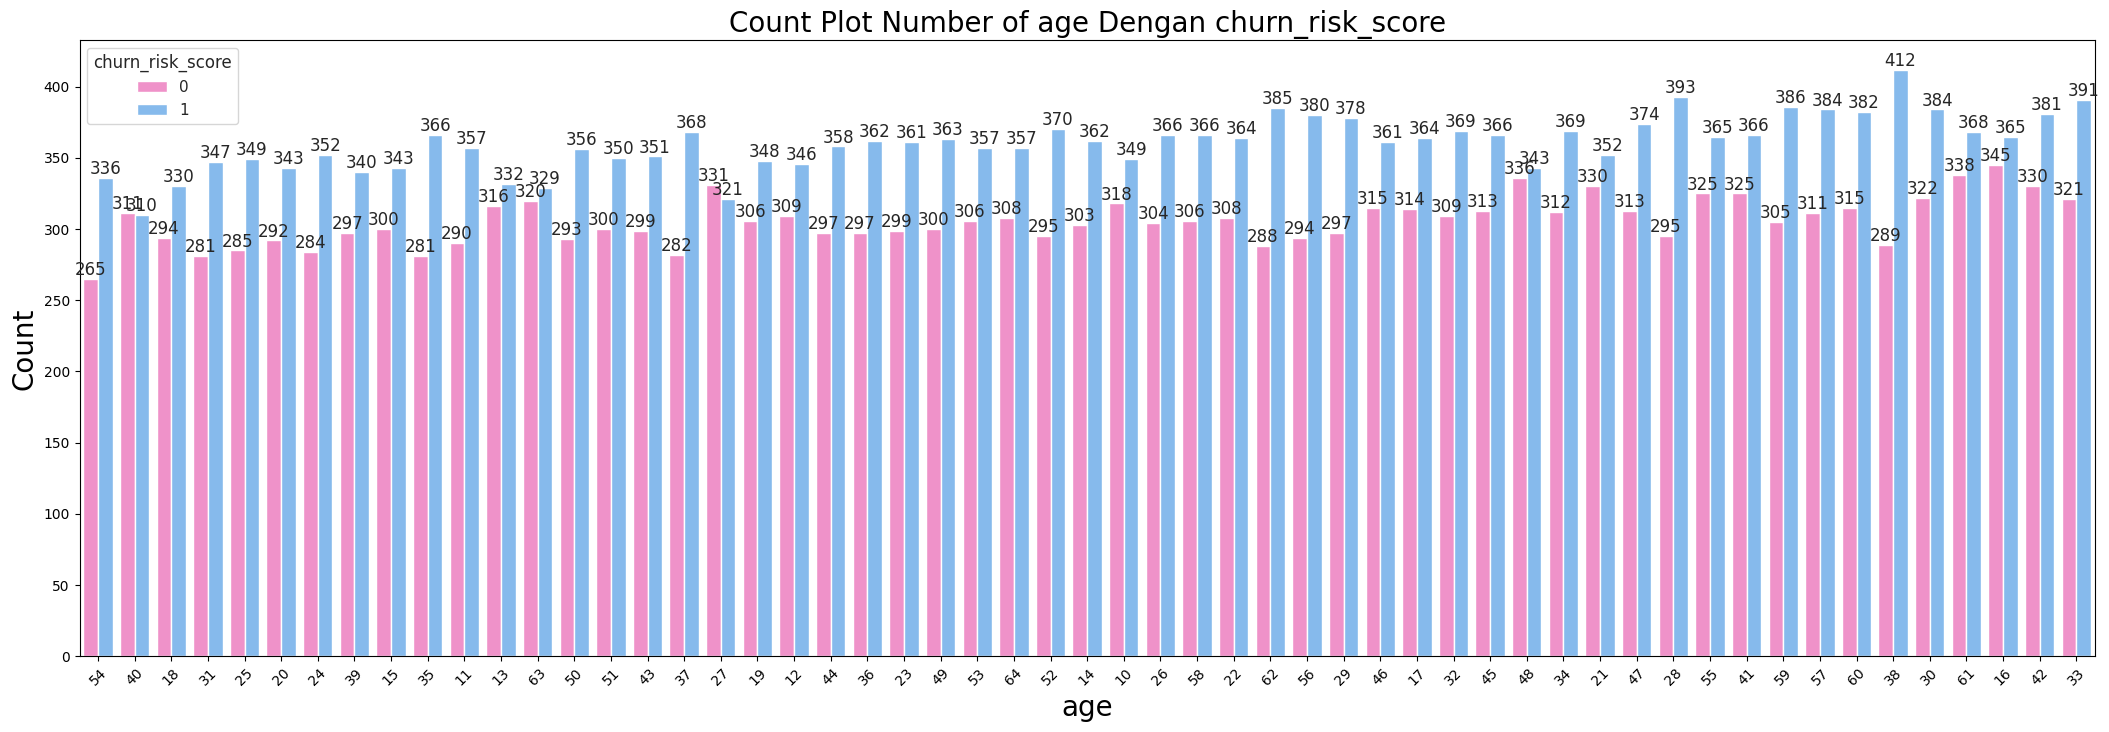

In [30]:
#plot bar dari age dan jumlah churn_risk_score
plotting_Profit('age','churn_risk_score') # Plot-1

* Mayoritas customer yang churn memiliki rentang umur antara 20-30 tahun.
* Customer yang tidak churn sebagian besar memiliki rentang umur antara 20-40 tahun.
* Terdapat kecenderungan semakin banyak customer yang tidak churn pada rentang umur yang lebih tua.

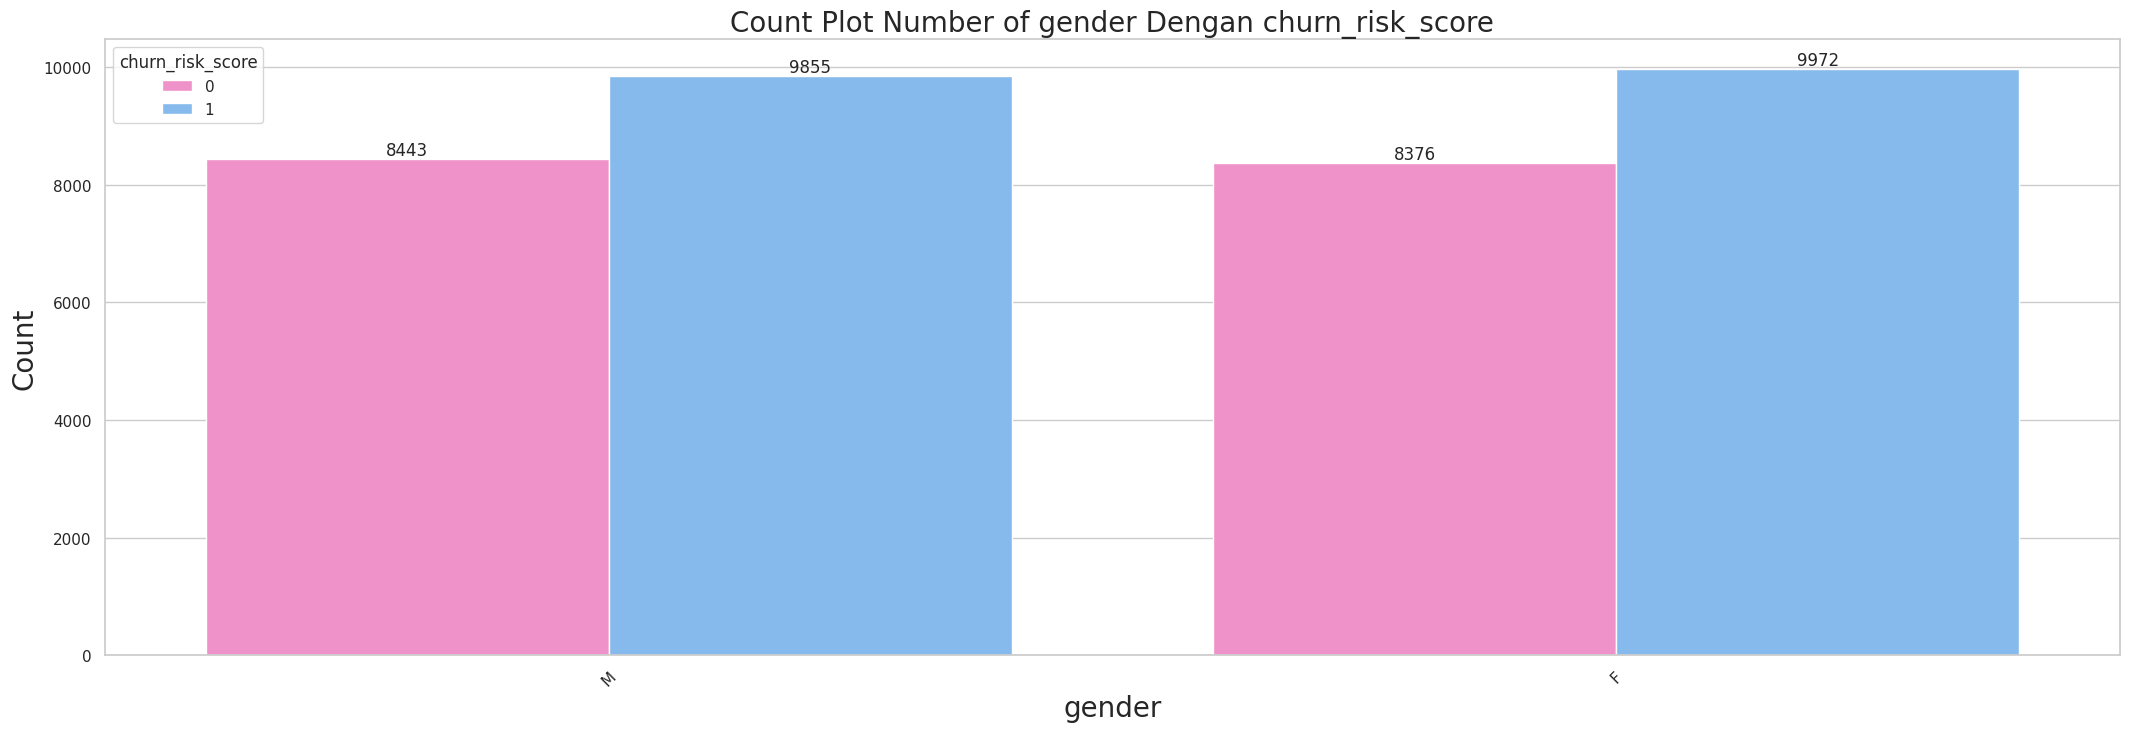

In [31]:
#plot bar dari gender dan jumlah churn_risk_score
plotting_Profit('gender','churn_risk_score') # Plot-2

* Jumlah pelanggan yang churn cenderung lebih banyak pada pelanggan dengan gender female.
* Pelanggan dengan gender male memiliki jumlah pelanggan yang lebih banyak pada setiap kategori churn_risk_score dibandingkan dengan pelanggan female.


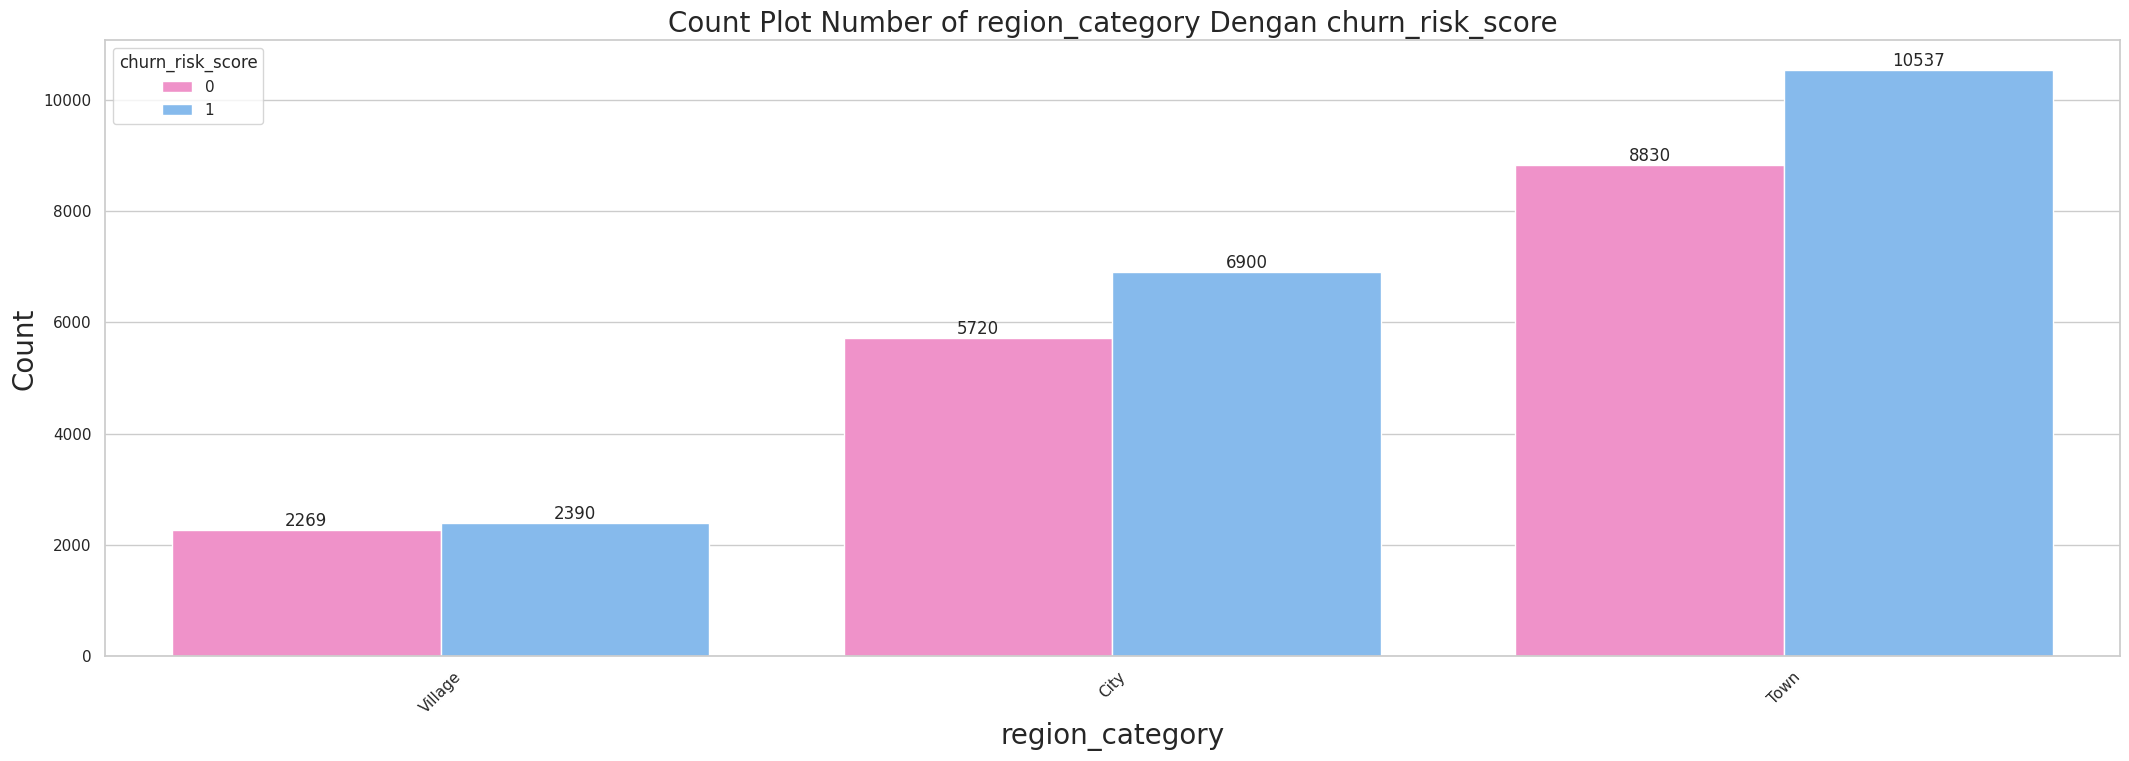

In [32]:
#plot bar dari region_category dan jumlah churn_risk_score
plotting_Profit('region_category','churn_risk_score') # Plot-3

* Kategori region yang paling banyak melakukan churn adalah "Town", diikuti oleh "City" dan "Village". Kategori region yang paling banyak melakukan not churn adalah sama urutan nya seperti churn "Town", diikuti oleh "City" dan "Village", tetapi dengan jumlah yang berbeda jumlah churn lebih banyak pada masing masing regionnya di bandingkan dengan masing masing jumlah not churn

* Mayoritas pelanggan yang memiliki churn risk score tinggi berada di kategori region "Town", sementara pelanggan dengan churn risk score rendah terdapat di kategori region yang beragam, namun paling banyak di "City".


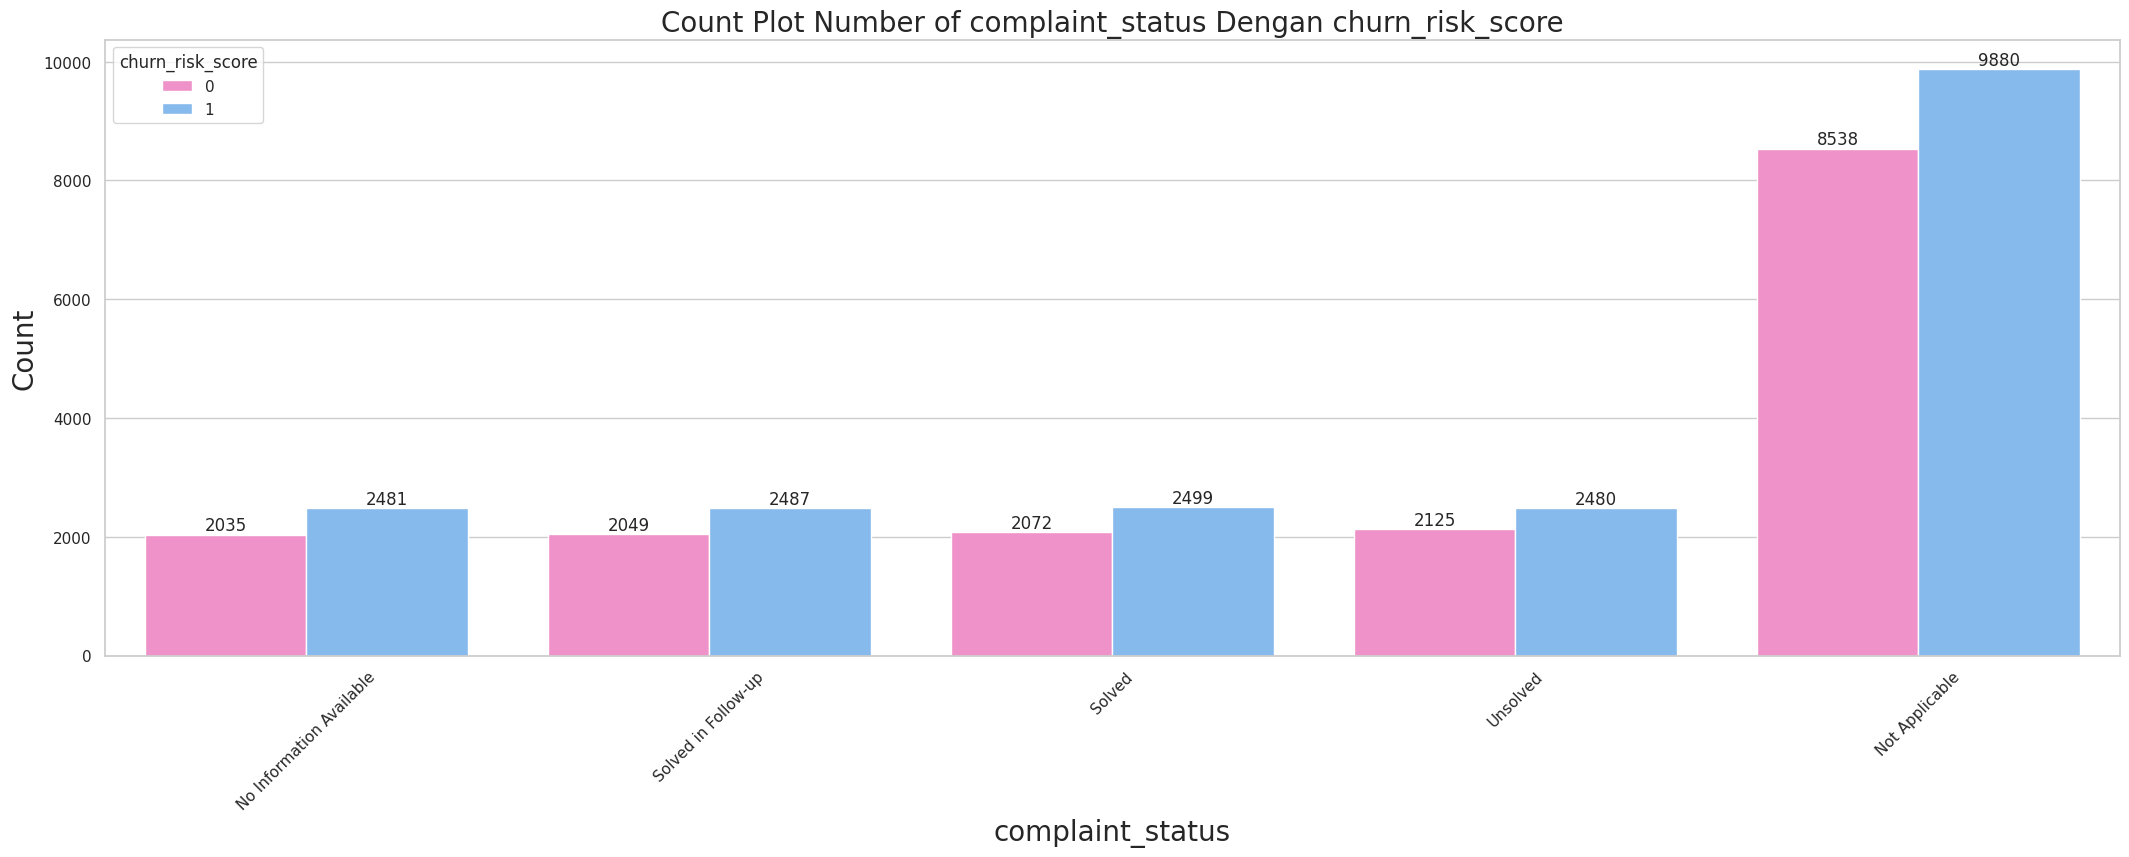

In [33]:
#plot bar dari complaint_status dan jumlah churn_risk_score
plotting_Profit('complaint_status','churn_risk_score') # Plot-4

* Dari grafik Count Plot Number of Complaint Status Dengan Churn Risk Score, dapat dilihat bahwa mayoritas pelanggan yang tidak melakukan pengaduan (complaint_status = 'No Information Available') cenderung memiliki churn risk score yang rendah, sedangkan pelanggan yang melakukan pengaduan cenderung memiliki churn risk score yang lebih tinggi. Ini mungkin menunjukkan bahwa semakin tidak puas pelanggan dengan layanan atau produk, semakin besar kemungkinan mereka akan beralih ke pesaing. Oleh karena itu, perusahaan harus memastikan bahwa pelanggan merasa puas dengan layanan dan produk yang mereka terima agar mereka tidak beralih ke pesaing.

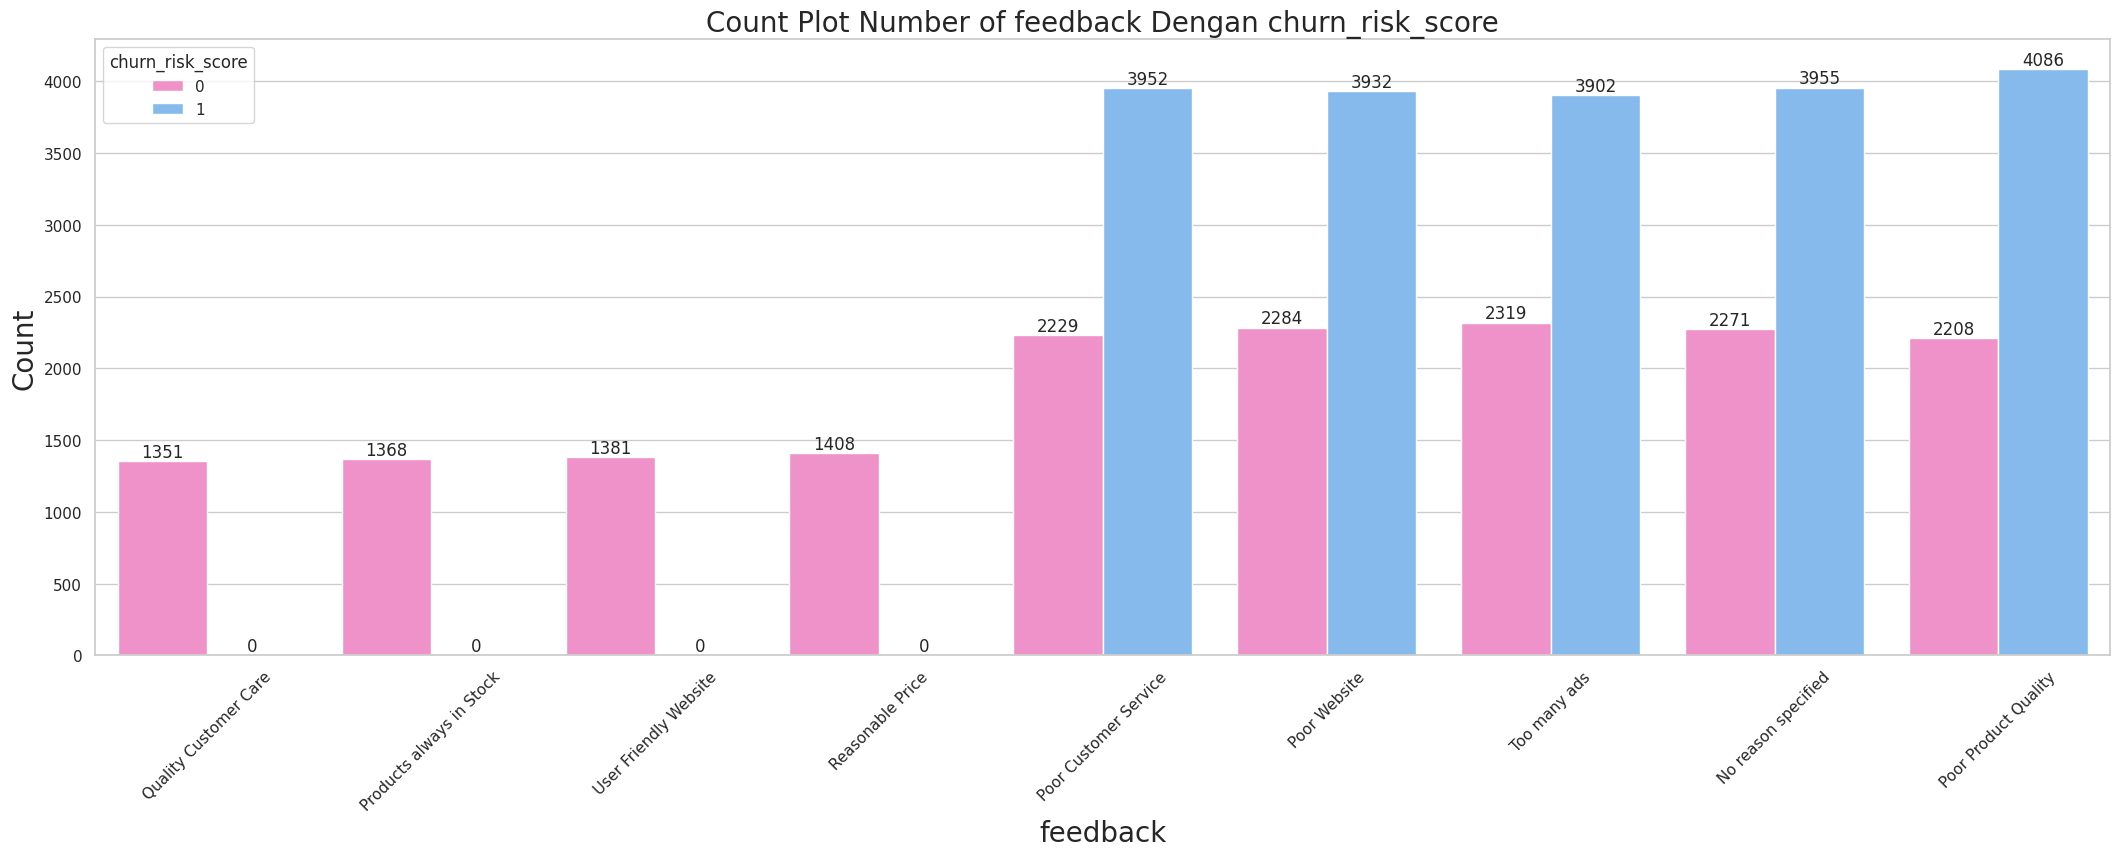

In [34]:
#plot bar dari feedback dan jumlah churn_risk_score
plotting_Profit('feedback','churn_risk_score') # Plot-5

* Dari grafik di atas dapat kita asumsikan dengan kategori 'sangat puas', 'puas', 'netral' dan 'tidak puas'
* Terlihat bahwa Mayoritas pelanggan memberikan feedback "tidak puas" atau "netral" terhadap layanan perusahaan seperti (kualitas yang buruk,sangat banyaknya iklan dan lain-lain). Hal ini perlu diperhatikan oleh perusahaan untuk memperbaiki kualitas layanan agar dapat meningkatkan kepuasan pelanggan.
* Pelanggan yang memberikan feedback "sangat puas" cenderung memiliki tingkat churn risk score yang rendah, sedangkan pelanggan yang memberikan feedback "tidak puas" atau "netral" cenderung memiliki tingkat churn risk score yang tinggi. Oleh karena itu, perusahaan perlu memperhatikan feedback pelanggan untuk mengurangi tingkat churn dan mempertahankan pelanggan yang loyal.

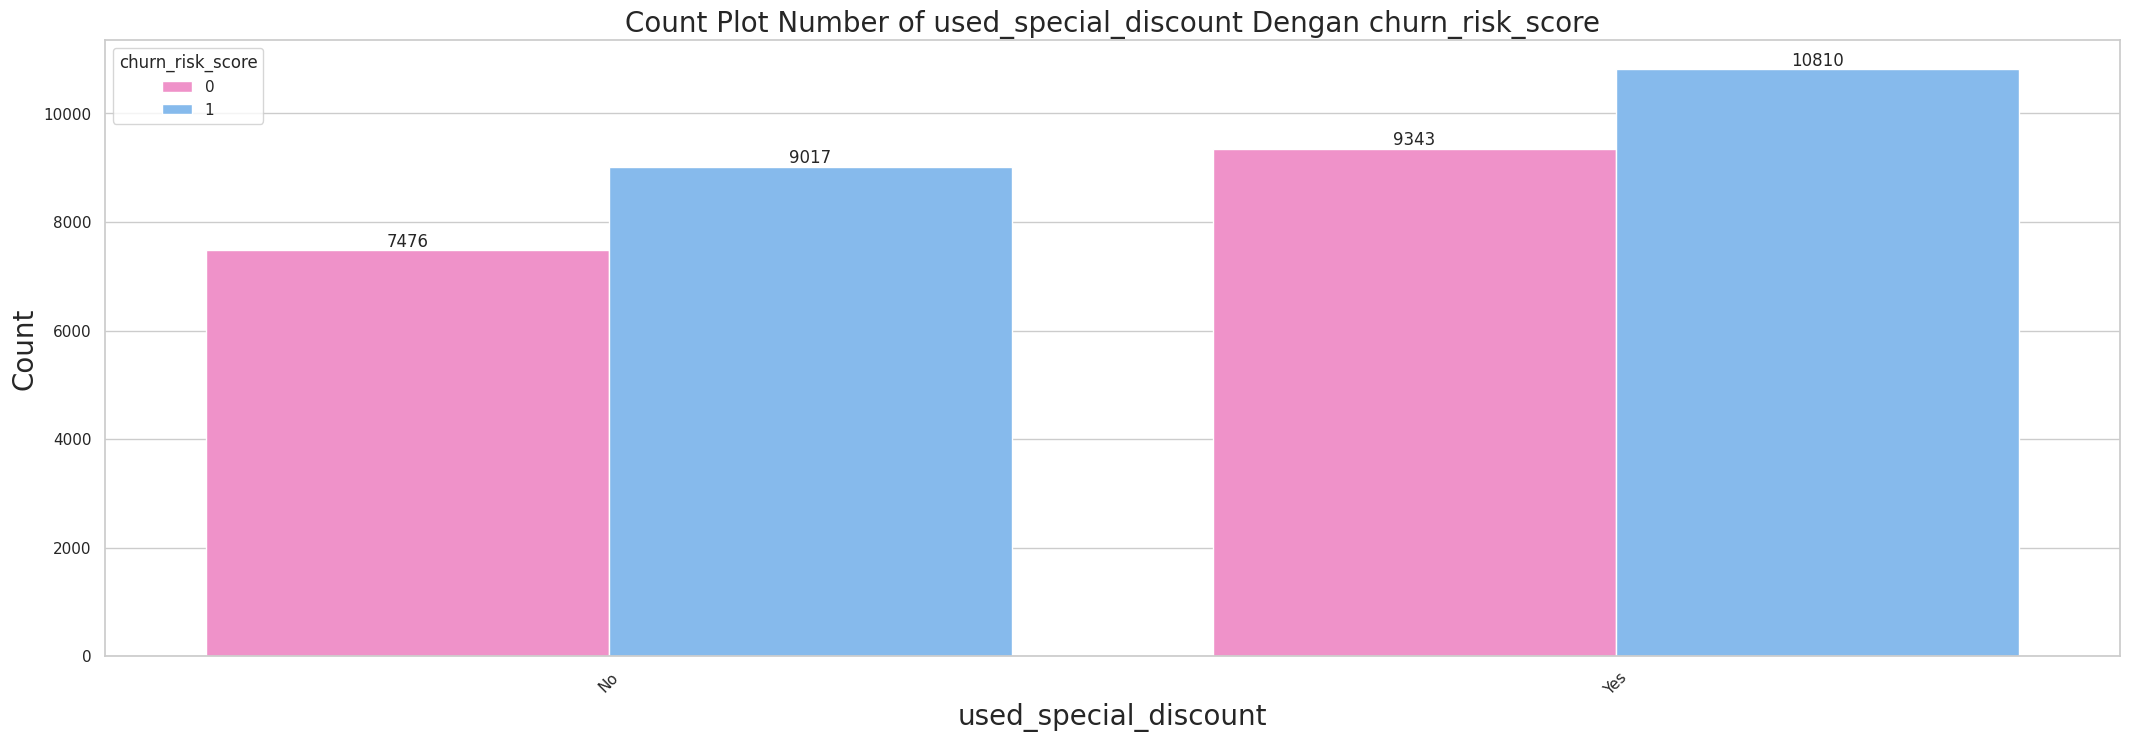

In [35]:
#plot bar dari used_special_discount dan jumlah churn_risk_score
plotting_Profit('used_special_discount','churn_risk_score') # Plot-6

* Dari grafik tersebut, dapat diambil insight bahwa mayoritas pelanggan yang menggunakan special discount memiliki churn risk score yang lebih rendah daripada pelanggan yang tidak menggunakan special discount. Hal ini menunjukkan bahwa penggunaan special discount dapat meningkatkan loyalitas pelanggan dan mengurangi risiko churn. Namun, perlu dilakukan analisis lebih lanjut untuk mengetahui faktor-faktor lain yang mempengaruhi churn risk score.

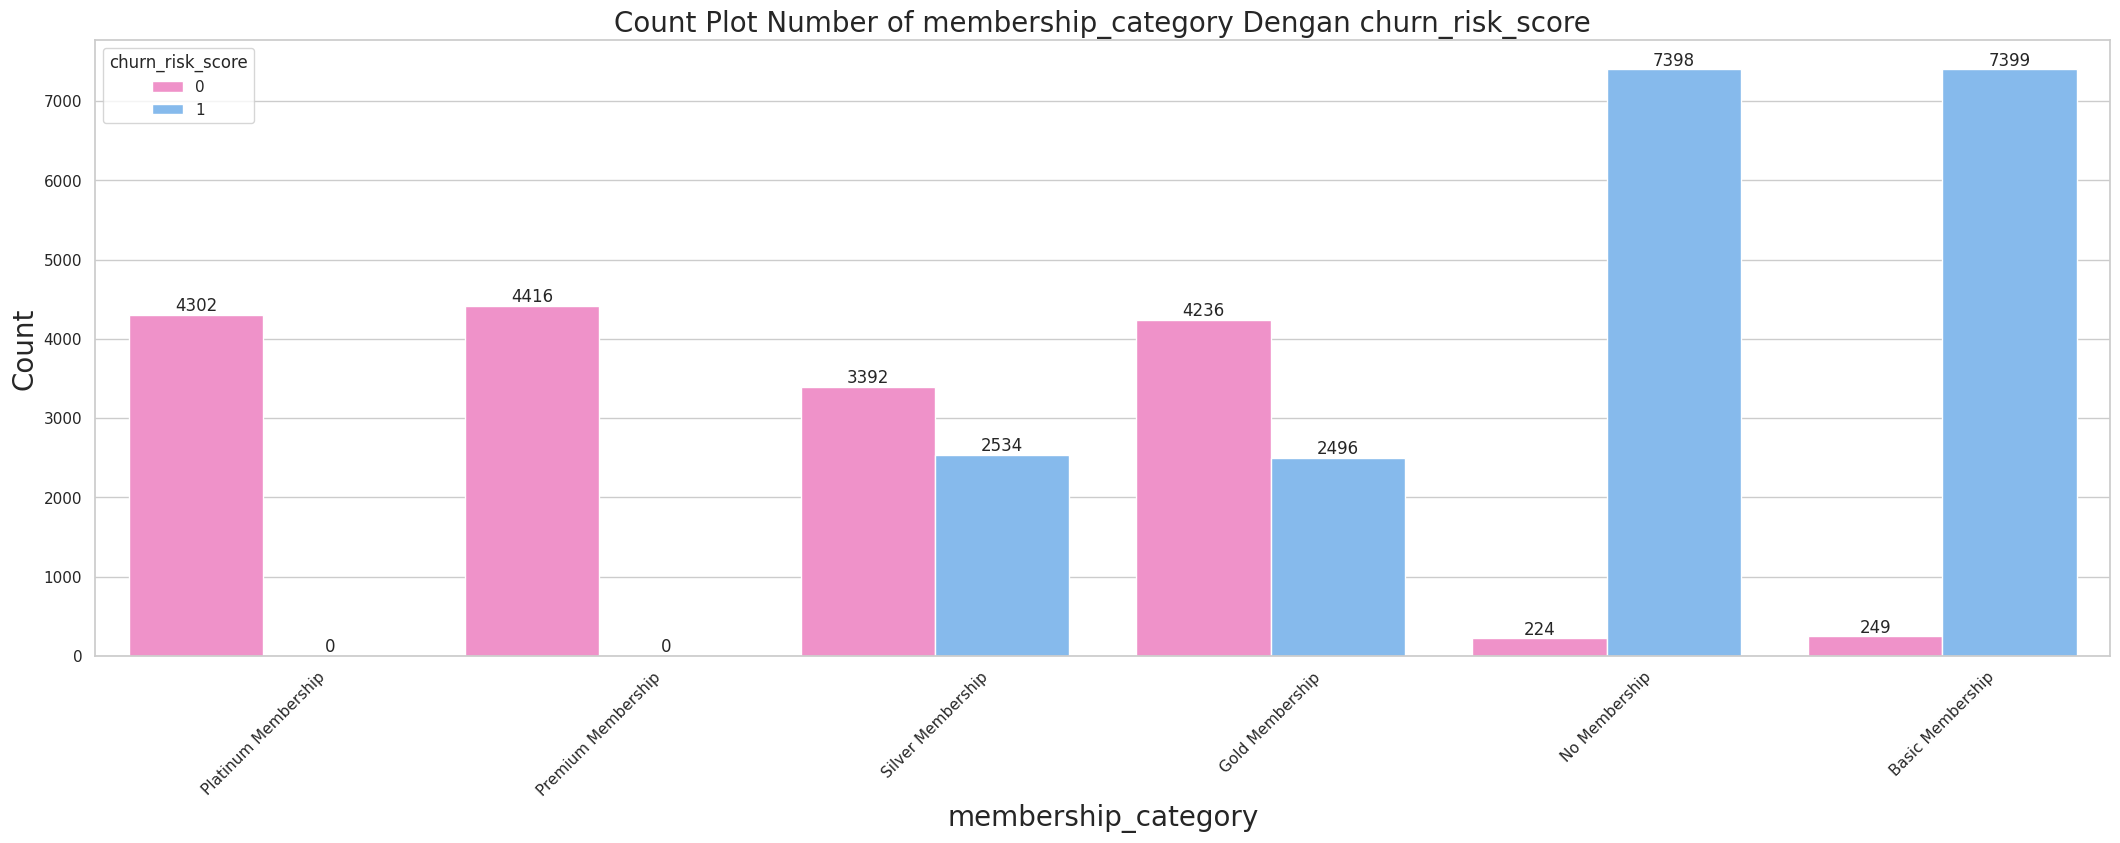

In [36]:
#plot bar dari membership_category dan jumlah churn_risk_score
plotting_Profit('membership_category','churn_risk_score') # Plot-7

* Dari grafik tersebut, dapat dilihat bahwa jumlah pelanggan yang churn cenderung lebih banyak terdapat pada kategori membership 'Basic Membership' dah 'No Membership'. Sedangkan pada kategori membership yang lebih tinggi seperti 'Gold Membership' dan 'Premium Membership', jumlah pelanggan yang churn jauh lebih sedikit. Hal ini dapat menjadi insight bahwa pelanggan yang lebih loyal cenderung memilih kategori membership yang lebih tinggi dan memberikan keuntungan bagi perusahaan dalam jangka panjang. Oleh karena itu, perusahaan dapat mempertimbangkan strategi untuk meningkatkan jumlah pelanggan pada kategori membership yang lebih tinggi.

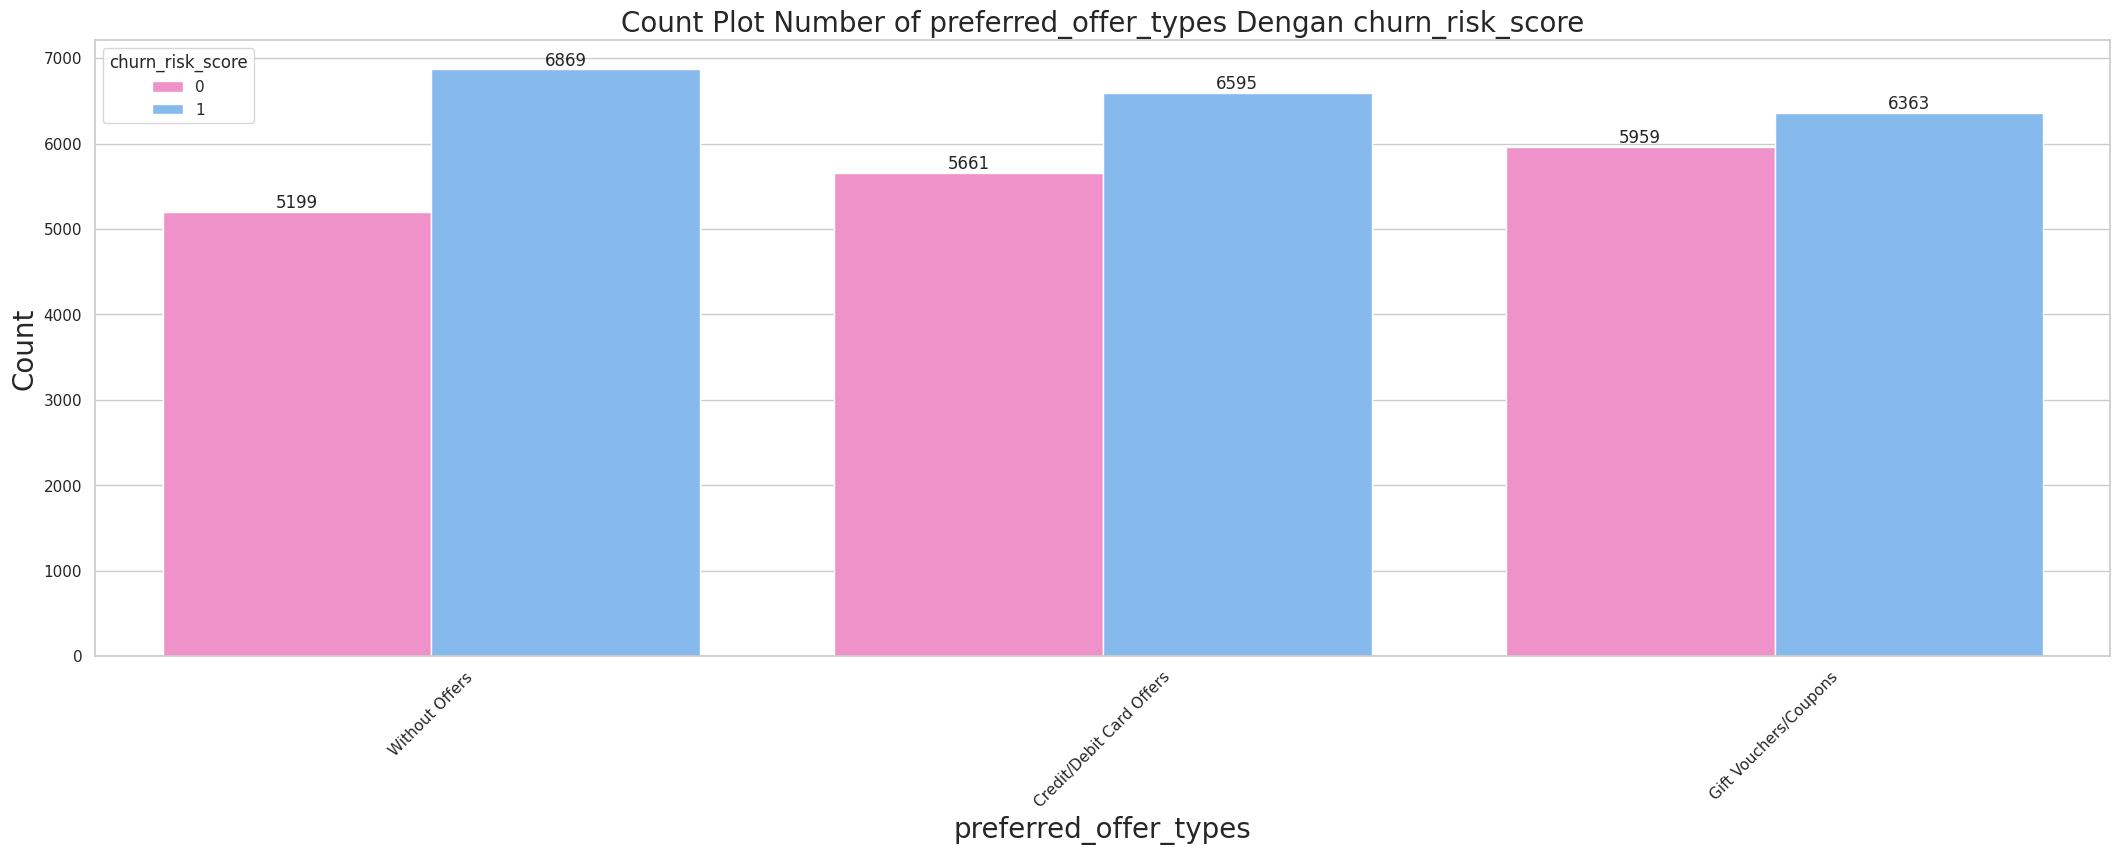

In [37]:
#plot bar dari preferred_offer_types dan jumlah churn_risk_score
plotting_Profit('preferred_offer_types','churn_risk_score') # Plot-8

* Mayoritas pelanggan memiliki nilai "preferred_offer_types" yang relatif sama, yaitu "Gift Vouchers/Coupons".
* Pelanggan dengan nilai churn(1) memiliki frekuensi terbanyak pada semua nilai kategori "preferred_offer_types", yaitu 'without offers'
* Pelanggan dengan nilai not churn(0) memiliki frekuensi terendah pada semua nilai kategori "preferred_offer_types",, yaitu 'without offers'
* Pelanggan dengan nilai churn(1) cenderung lebih memilih "Credit/Debit Card Offers" dibandingkan dengan not churn (0).

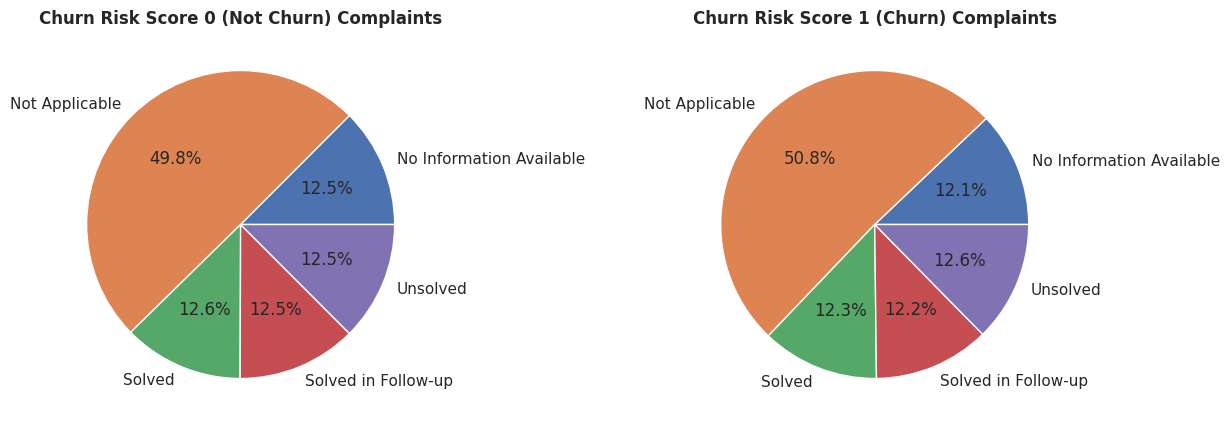

In [38]:
# Check apakah kolom 'churn_risk_score' ada di DataFrame
if 'churn_risk_score' not in df.columns:
    print("The 'churn_risk_score' column does not exist in the dataframe.")
else:
    # Groupby berdasarkan kolom 'complaint_status', dan 'churn_risk_score', dan hitung jumlah baris untuk Churn Risk Score 1
    df_grouped_1 = df.groupby(['complaint_status', 'churn_risk_score']).size().reset_index(name='count')
    df_grouped_1 = df_grouped_1[df_grouped_1['churn_risk_score']==1]

    # Groupby berdasarkan kolom 'complaint_status', dan 'churn_risk_score', dan hitung jumlah baris untuk Churn Risk Score 0
    df_grouped_0 = df.groupby(['complaint_status', 'churn_risk_score']).size().reset_index(name='count')
    df_grouped_0 = df_grouped_0[df_grouped_0['churn_risk_score']==0]

    # Buat gambar dengan dua subplot
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Buat diagram lingkaran untuk Skor Risiko Churn 0 di subplot kiri
    axs[0].pie(df_grouped_1['count'], labels=df_grouped_0['complaint_status'], autopct='%1.1f%%')
    axs[0].set_title('Churn Risk Score 0 (Not Churn) Complaints', loc='center', fontweight='bold')

    # Buat diagram lingkaran untuk Skor Risiko Churn 0 di subplot kiri
    axs[1].pie(df_grouped_0['count'], labels=df_grouped_1['complaint_status'], autopct='%1.1f%%')
    axs[1].set_title('Churn Risk Score 1 (Churn) Complaints', loc='center', fontweight='bold')

    # Menampilkan gambar 
    plt.show()


- Grafik yang ditampilkan adalah dua pie chart yang membagi data berdasarkan kolom "complaint_status" untuk pelanggan yang termasuk dalam kategori churn risk score 1 (kiri) dan 0 (kanan). Insight yang dapat diambil antara lain:

    * Pelanggan yang termasuk dalam kategori churn risk score 0 (Not Churn) memiliki persentase keluhan tertinggi pada status "Solved" (12,6%) dan "Solved in Follow-up" (12,5%).
    * Pelanggan yang termasuk dalam kategori churn risk score 0 (Not Churn) memiliki persentase keluhan terendah pada status "No Information Available" (12.5%) dan "Solved in follow up" (12,5%).
    * Pelanggan yang termasuk dalam kategori churn risk score 1 (Churn) memiliki persentase keluhan tertinggi pada status "Unsolved" (12,6%) dan "Solved" (12,3%).
    * Pelanggan yang termasuk dalam kategori churn risk score 1 (Churn) memiliki persentase keluhan terendah pada status "No Information Available" (12,1%) dan "solved in follow up" (16,1%).
    * Distribusi complains berdasarkan churn risk score, yang dapat membantu mengidentifikasi alasan utama pelanggan melakukan churn.
    * Perbandingan persentase complains antara pelanggan yang churn dan yang tidak churn, yang dapat memberikan gambaran tentang hubungan antara skor risiko churn dan status keluhan.
    * Perbandingan distribusi complains antara pelanggan yang churn dan yang tidak churn, yang dapat menyoroti jenis keluhan utama yang terkait dengan pelanggan yang churn.


Text(0.5, 0, 'Membership Category')

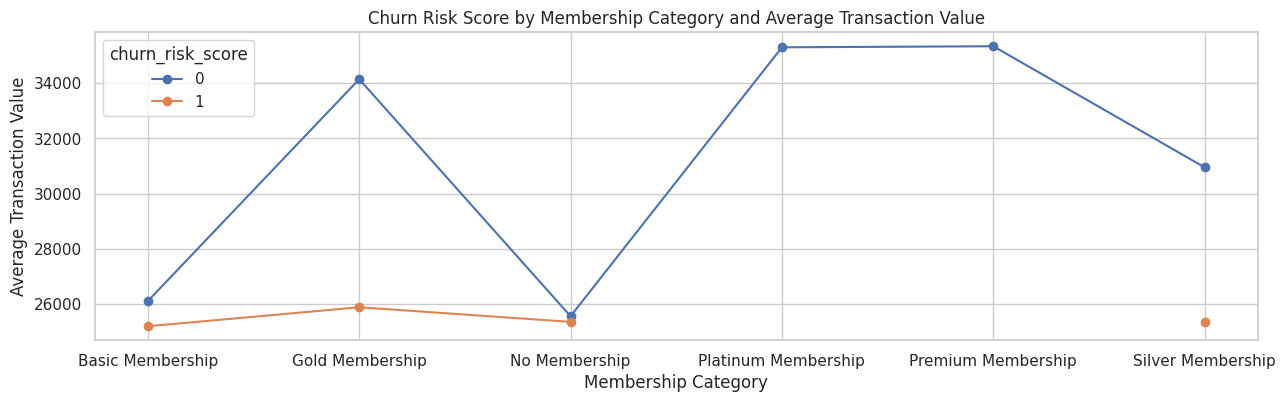

In [39]:
# group membership_category column dan 'churn_risk_score' dengan menghitung mean kolom 'avg_transaction_value'
df_grouped = df.groupby(['membership_category', 'churn_risk_score'])['avg_transaction_value'].mean().reset_index()

# Membuat pivot table dari grouped dataframe
df_pivot = df_grouped.pivot(index='membership_category', columns='churn_risk_score', values='avg_transaction_value')

# Sort pivot table  membership kategori dalam ascending order
df_pivot = df_pivot.sort_index(ascending=True)

# Plot pivot table dengan line)
ax = df_pivot.plot(kind='line', figsize=(15, 4), marker='o')

# Add Judul and labels kedalam plot
ax.set_title('Churn Risk Score by Membership Category and Average Transaction Value')
ax.set_ylabel('Average Transaction Value')
ax.set_xlabel('Membership Category')


- Grafik tersebut menunjukkan hubungan antara churn_risk_score dan rata-rata nilai transaksi untuk setiap kategori membership. Dapat dilihat bahwa semakin tinggi skor risiko not churn, semakin tinggi rata-rata nilai transaksi. Selain itu, juga dapat dilihat bahwa kategori keanggotaan "Basic" memiliki rata-rata nilai transaksi yang paling rendah, sementara kategori membership "Premium" dan Platinum memiliki rata-rata nilai transaksi yang paling tinggi. Oleh karena itu, insight yang dapat diambil adalah pentingnya memperhatikan churn_risk_score dalam menentukan strategi untuk meningkatkan nilai transaksi pelanggan, serta memberikan perhatian khusus pada pelanggan kategori keanggotaan "Basic" yang memiliki rata-rata nilai transaksi yang lebih rendah.

Text(0.5, 0, 'Membership Category')

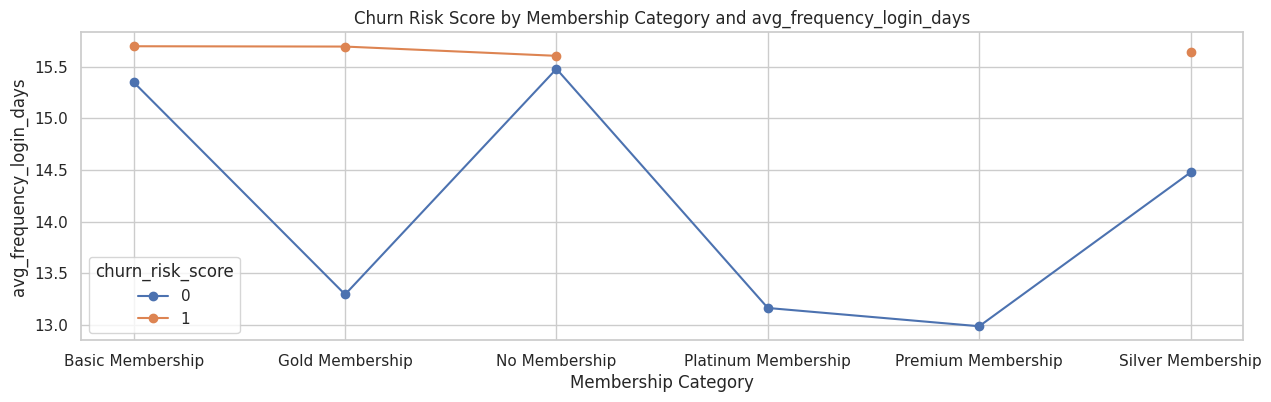

In [40]:
# group membership_category column dan 'churn_risk_score' dengan menghitung mean kolom 'avg_frequency_login_days'
df_grouped = df.groupby(['membership_category', 'churn_risk_score'])['avg_frequency_login_days'].mean().reset_index()

# Membuat pivot table dari grouped dataframe
df_pivot = df_grouped.pivot(index='membership_category', columns='churn_risk_score', values='avg_frequency_login_days')

# Sort pivot table  membership kategori dalam ascending order
df_pivot = df_pivot.sort_index(ascending=True)

# Plot pivot table dengan line
ax = df_pivot.plot(kind='line', figsize=(15, 4), marker='o')

# Add Judul and labels kedalam plot
ax.set_title('Churn Risk Score by Membership Category and avg_frequency_login_days')
ax.set_ylabel('avg_frequency_login_days')
ax.set_xlabel('Membership Category')

* Semakin tinggi churn risk score, semakin rendah rata-rata jumlah hari login yang dilakukan oleh pengguna dalam satu periode tertentu. Hal ini menunjukkan adanya korelasi negatif antara churn risk score dan frekuensi login pengguna.
* Pengguna dengan kategori Membership "Premium" cenderung memiliki frekuensi login yang lebih rendah daripada pengguna dengan kategori keanggotaan lainnya, terutama pada churn risk score yang tinggi. Hal ini menunjukkan bahwa pengguna dengan kategori keanggotaan "Premium" cenderung lebih tidak loyal terhadap platform dibandingkan dengan pengguna dengan kategori keanggotaan lainnya.
* Pengguna dengan kategori keanggotaan "Basic" dan no membership cenderung memiliki frekuensi login yang lebih tinggi dibandingkan dengan pengguna dengan kategori keanggotaan lainnya pada churn risk score yang rendah. Hal ini menunjukkan bahwa pengguna dengan kategori keanggotaan "Basic" cenderung kurang loyal terhadap platform, terutama pada churn risk score yang rendah.

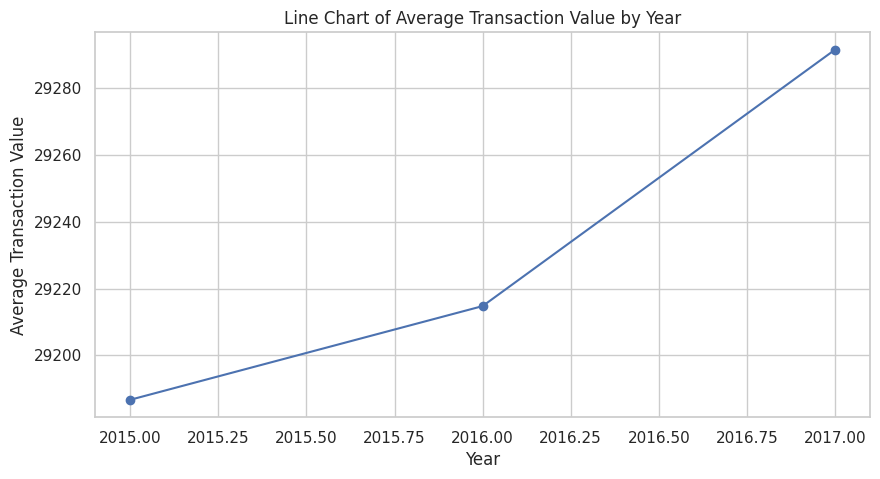

In [42]:
# filter data from 2015 June 02 to 2017 Dec 31
start_date = pd.Timestamp('2015-06-02')
end_date = pd.Timestamp('2017-12-31')
df_filtered = df.loc[(df['joining_date'] >= start_date) & (df['joining_date'] <= end_date)]

# set joining_date as index
df_filtered = df_filtered.set_index('joining_date')

# group by year
df_year = df_filtered.groupby(df_filtered.index.year)

# calculate mean of avg_transaction_value by year
df_mean = df_year.mean()

# create array of axes with two rows and one column
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)

# plot line chart for avg_transaction_value by year
ax.plot(df_mean.index, df_mean['avg_transaction_value'], marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Average Transaction Value')
ax.set_title('Line Chart of Average Transaction Value by Year')

plt.show()


* Dari grafik tersebut, dapat dilihat bahwa rata-rata nilai transaksi pelanggan cenderung meningkat seiring dengan waktu, mulai dari tahun 2015 hingga 2017. Hal ini menunjukkan bahwa pelanggan menjadi semakin aktif dalam melakukan transaksi dan mungkin semakin loyal terhadap bisnis. Ini dapat menjadi sinyal positif bagi bisnis untuk mempertahankan pelanggan yang ada dan menarik pelanggan baru dengan menawarkan layanan atau produk yang menarik.

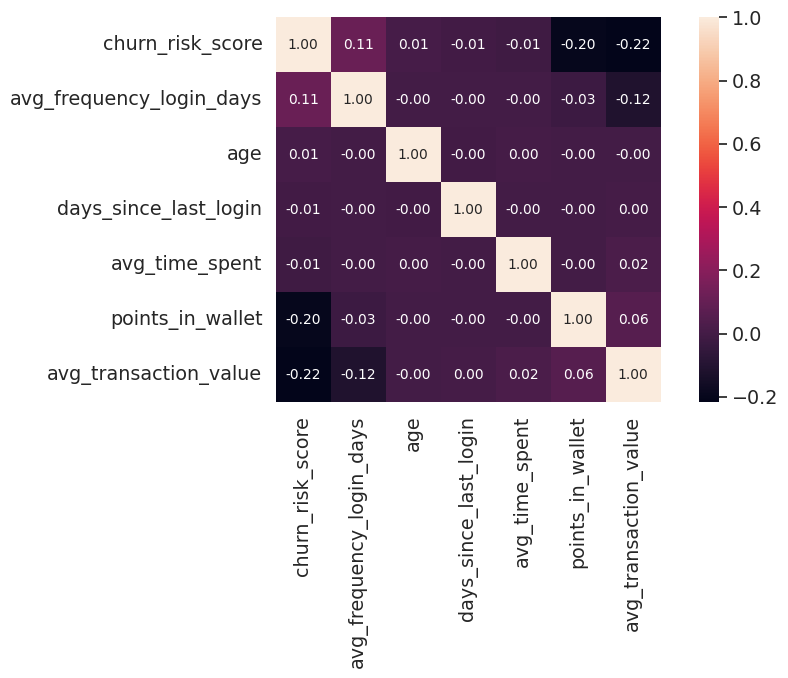

In [43]:
#cek korelasi numerikal 
k = 30 # number of variables dari heatmap
plt.figure(figsize=(10,5))
cols = df.corr().nlargest(k, 'churn_risk_score')['churn_risk_score'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
df.corr().nlargest(7, 'churn_risk_score')['churn_risk_score']


churn_risk_score            1.000000
avg_frequency_login_days    0.114466
age                         0.006048
days_since_last_login      -0.006804
avg_time_spent             -0.013594
points_in_wallet           -0.200662
avg_transaction_value      -0.217844
Name: churn_risk_score, dtype: float64

In [45]:
df.drop(columns=['user_id','joining_date','last_visit_time','days_since_last_login'],inplace=True)

In [46]:
#phik korelation untuk numerikal dan kategorikal
df.phik_matrix().nlargest(18,'churn_risk_score')['churn_risk_score']

interval columns not set, guessing: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942304
feedback                        0.455936
points_in_wallet                0.449527
avg_transaction_value           0.408894
avg_frequency_login_days        0.165866
joined_through_referral         0.043545
offer_application_preference    0.029310
preferred_offer_types           0.025768
avg_time_spent                  0.025319
used_special_discount           0.013849
region_category                 0.012242
past_complaint                  0.011981
medium_of_operation             0.010742
complaint_status                0.003034
internet_option                 0.002008
gender                          0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

* Dari data di atas kita dapat melihat korelasi antar kolom dengan target, sehingga dapat menjadi acuan dalam melakuakan feature selection.


# V. Feature Engineering / Preprocessing

In [47]:
# Mengonversi kolom menjadi list dan disimpan pada variabel baru
ncol = df.describe().columns.tolist()
cacol = df.select_dtypes(include =['object']).columns.tolist()

In [48]:
# Categorical overview
df[cacol].describe(include = 'object').T

,count,unique,top,freq
gender,36646,2,F,18348
region_category,36646,3,Town,19367
membership_category,36646,6,Basic Membership,7648
joined_through_referral,36646,2,No,21093
preferred_offer_types,36646,3,Gift Vouchers/Coupons,12322
medium_of_operation,36646,3,Desktop,19120
internet_option,36646,3,Wi-Fi,12290
used_special_discount,36646,2,Yes,20153
offer_application_preference,36646,2,Yes,20247
past_complaint,36646,2,No,18418


In [49]:
#cek keberadaan kolom
column_names = ['membership_category','feedback','points_in_wallet','avg_transaction_value','churn_risk_score']
column_indices = [df.columns.get_loc(col) for col in column_names]
print(column_indices)

[3, 16, 11, 9, 17]


In [140]:
df1 = df.iloc[:,[3, 16, 11, 9,17]]
df1.head()

,membership_category,feedback,points_in_wallet,avg_transaction_value,churn_risk_score
0,No Membership,Poor Website,627.48,38604.69,1
1,Basic Membership,Poor Customer Service,575.97,7665.66,1
2,Silver Membership,Too many ads,767.93,37671.69,0
3,No Membership,Too many ads,590.22,15678.14,1
4,Silver Membership,Poor Product Quality,722.04,8422.68,0


berikut adalah Feature importance dimana metode untuk menentukan seberapa penting setiap fitur atau atribut dalam model pembelajaran mesin dalam membuat keputusan atau prediksi. 

In [51]:
#cek uniq nilai untuk nonstandard missing value
for i in df1:
    print(i, ':' , df1[i].unique(), '\n')

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership'] 

feedback : ['Poor Website' 'Poor Customer Service' 'Too many ads'
 'Poor Product Quality' 'No reason specified' 'Products always in Stock'
 'Reasonable Price' 'Quality Customer Care' 'User Friendly Website'] 

points_in_wallet : [627.48 575.97 767.93 ... 835.98 744.99 700.93] 

avg_transaction_value : [38604.69  7665.66 37671.69 ... 39305.35 46108.73 26905.49] 

churn_risk_score : [1 0] 



In [141]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [142]:
jk = df1.iloc[:, [3,4]]
calc_vif(jk)

,variables,VIF
0,avg_transaction_value,1.392723
1,churn_risk_score,1.392723


dari perhitungan multicolarity di atas adalah variable tersebut tidak ada hubungan dengan variable independent lainnya

# Data Splitting

In [54]:
# Split Fitur dan Target
X = df1.drop('churn_risk_score', axis=1)
y = df1['churn_risk_score']

In [55]:
# Split Train dan Test
X_train, X_test,  y_train, y_test = train_test_split(X,y,shuffle=True, test_size=0.2,stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, stratify=y_train, random_state=42)

In [56]:
for i in [X_train, X_test, X_val, y_train, y_test, y_val]:
    print(i.shape)

(23452, 4)
(7330, 4)
(5864, 4)
(23452,)
(7330,)
(5864,)


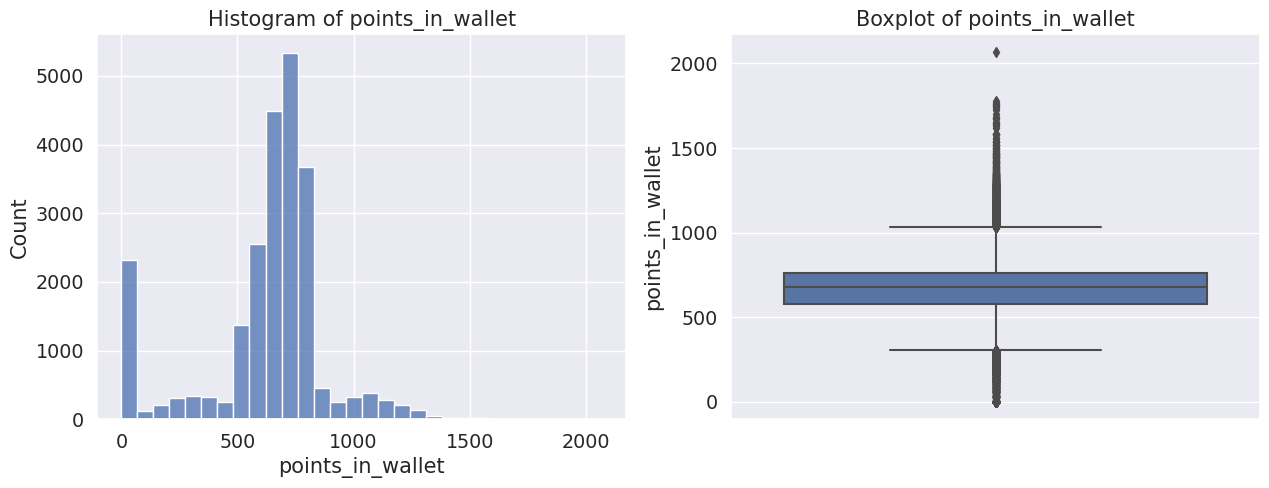


Skewness Value :  -0.7714593438032831


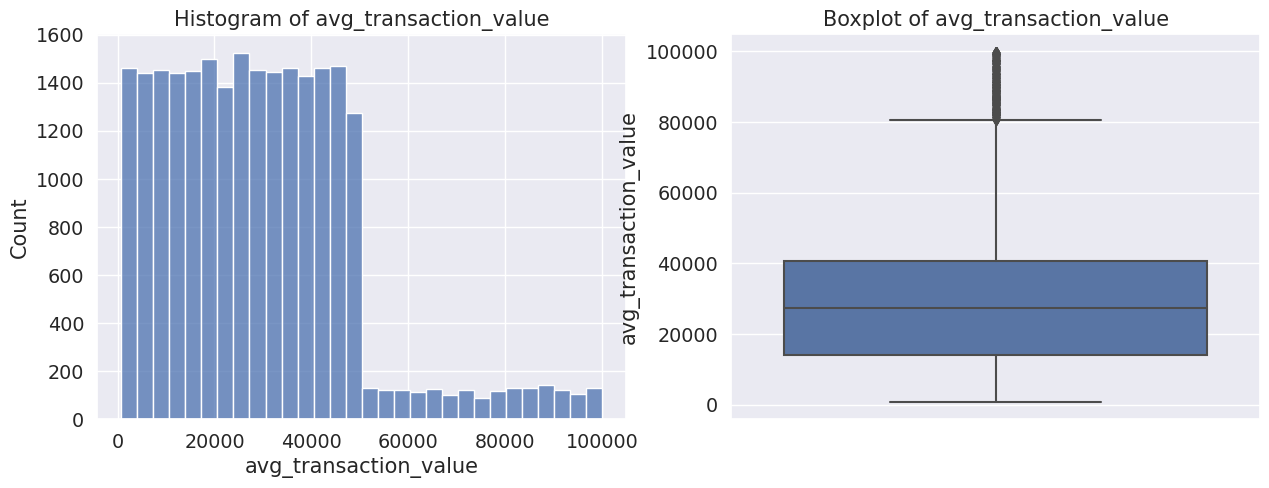


Skewness Value :  1.0233066665534205


In [57]:
#melihat distribusi & outlier pada kolom numerik 
num_col_unclear = X_train[['points_in_wallet','avg_transaction_value'
 ]]

# looping num_col_unclear
for col in num_col_unclear:
    # Define figure size
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], bins=30)
    plt.title('Histogram of {}'.format(col))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[col])
    plt.title('Boxplot of {}'.format(col))
    

    plt.show()
    # diagnostic_plots(num_col)
    print('\nSkewness Value : ', X_train[col].skew())

* Batas distribusi normal adala 0.5 s/d -0.5 jika melebihi dari batasan tersebut maka distribusi dapat di katakan distribusi tidak normal 
* untuk handling distribusi normal menggunakan method Gaussian sedangkan distribusi tidak normal menggunakan Tukeys(IQR) method 
* Kolom 'points_in_wallet' memiliki distribusi yang masuk kedalam tidak normal dengan sedikit skewness ke kanan, dan beberapa outlier di sebelah kanan dari boxplot yang perlu diperhatikan.

* Kolom 'avg_transaction_value' juga memiliki distribusi yang tidak normal,  ada beberapa outlier di sebelah kanan dari boxplot. Skewness untuk kolom ini adalah 1.02 yang menunjukkan distribusi sedikit condong ke kiri.

* Untuk Normalization di lakukan dengan metoda MinMaxScaler mengingat outlier adalah tidak normal

In [58]:
#pipline scaler
num_pipeline = Pipeline([
        ('winsorizer_iqr', Winsorizer(capping_method='iqr', tail='both', fold=3)),  #capping process
        ('imputer', SimpleImputer(strategy='median')), #imputer missing value
        ('scaler',  MinMaxScaler()) #scaling numerical 
    ])

num_tr = num_pipeline.fit_transform(X_train[['points_in_wallet','avg_transaction_value']])
num_tr

array([[0.62321213, 0.81591314],
       [0.55274127, 0.3812461 ],
       [0.21179929, 0.41093981],
       ...,
       [0.57542038, 0.65031465],
       [0.39679792, 0.10079385],
       [0.47196317, 0.03710742]])

In [59]:
# Pepiline untuk handling outliers pada dataset
cat_1_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder())
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_train[['feedback']])

In [60]:
membership_level = ['No Membership', 'Basic Membership', 'Silver Membership','Gold Membership','Premium Membership','Platinum Membership']
#urutan membership berdasarkan poin yang dikumpulkan
cat_2_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories=[membership_level]))
    ])

cat_2_tr = cat_2_pipeline.fit_transform(X_train[['membership_category']])

In [61]:
#menggabungkan scaler & ordinal dalam 1 variable 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['points_in_wallet','avg_transaction_value']),
        ("ohe_enc", cat_1_pipeline, ['feedback']),
        ("ordinal_enc", cat_2_pipeline, ['membership_category'])
        
    ])
#final x_train
train_final = full_pipeline.fit_transform(X_train)
train_final

array([[0.62321213, 0.81591314, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.55274127, 0.3812461 , 0.        , ..., 0.        , 0.        ,
        2.        ],
       [0.21179929, 0.41093981, 0.        , ..., 0.        , 0.        ,
        2.        ],
       ...,
       [0.57542038, 0.65031465, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.39679792, 0.10079385, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.47196317, 0.03710742, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [62]:
#final test 
test_final = full_pipeline.transform(X_test)
test_final.shape

(7330, 12)

In [63]:
#val_train
val_tr = full_pipeline.transform(X_val)
val_tr.shape

(5864, 12)

# Architecture Model (Pipeline (Tensorflow))

In [64]:
train_pipe = tf.data.Dataset.from_tensor_slices((train_final, y_train)).batch(64).repeat(3)
test_pipe  = tf.data.Dataset.from_tensor_slices((test_final, y_test)).batch(64)
val_pipe   = tf.data.Dataset.from_tensor_slices((val_tr, y_val)).batch(64)

* Data train, test, dan validation diproses menggunakan TensorFlow Dataset API dengan membagi data menjadi batch-batch kecil dengan ukuran 64, yang dapat mempercepat proses training pada model neural network.
* Data train diulang (repeat) sebanyak 3 kali, artinya model akan mempelajari data train sebanyak 3 kali pada setiap epoch.
* Data test dan validation tidak diulang, karena model hanya akan mempelajari data train dan diuji pada data test dan validation pada akhir setiap epoch.

In [65]:
alp = 10
inp = train_final.shape[1]
out = 1
hid = int(len(train_final)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

Jumlah neuron pada hidden layer: 180


cara menghitung jumlah neuron pada hidden layer dengan menggunakan formula Hecht-Nielsen yang disebut sebagai "the rule of thumb" atau aturan praktis.
Penentuan jumlah neuron di hidden layer

Nh=Ns(α∗(Ni+No)) 

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

Referensi: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# VI. Model Definitions

## Sequential Default

In [66]:

model_seq_def = Sequential()
model_seq_def.add(Dense(inp, activation='relu',kernel_initializer='GlorotUniform', input_shape=(inp,)))
model_seq_def.add(Dense(hid, activation='relu')) 
model_seq_def.add(Dense(out, activation='sigmoid'))

# Compile
model_seq_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_seq_def.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 180)               2340      
                                                                 
 dense_2 (Dense)             (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


* Model yang dibuat menggunakan library Keras Sequential, yang memungkinkan untuk menambahkan layer dengan mudah dan cepat.
* Model terdiri dari 3 layer yaitu input layer dengan mengunakan variable yang telah di set menggunakan formula Hecht-Nielsen,inp(input layer), hid(hiden layer), dan out(output layer) dengan 1 node dan menggunakan sigmoid sebagai activation function-nya.
* Model di-compile menggunakan binary crossentropy sebagai loss function, Adam optimizer, dan accuracy sebagai metrics.
Karena tidak ada pengaturan tertentu pada kernel_initializer atau kernel_regularizer, maka penggunaan nilai default di dalam layer Dense akan digunakan.

# Sequential Tune

In [67]:
model_seq_tune = Sequential()

model_seq_tune.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,), kernel_initializer='he_uniform')) # input layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())

model_seq_tune.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))

model_seq_tune.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))

model_seq_tune.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform',bias_initializer=Zeros())) # hidden layer
model_seq_tune.add(tf.keras.layers.BatchNormalization())
model_seq_tune.add(tf.keras.layers.Dropout(0.1))
model_seq_tune.add(tf.keras.layers.Dense(out, activation='sigmoid')) # output layer

# Compile the model
model_seq_tune.compile(loss='binary_crossentropy',
                       optimizer='Adam',
                       metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.6)]
                      )

model_seq_tune.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)               

* penggunaan beberapa hidden layer dengan jumlah neuron yang berbeda, serta penggunaan teknik regularization (kernel_regularizer) dan normalisasi (BatchNormalization) untuk memperbaiki performa model. Selain itu, penggunaan optimizer Adam dan BinaryAccuracy sebagai metrik evaluasi juga dapat membantu meningkatkan akurasi model.
* Pada summary model ini terdapat informasi tentang jumlah parameter pada setiap layer dan jumlah total parameter pada model. Terdapat juga informasi tentang bentuk (shape) output pada setiap layer.

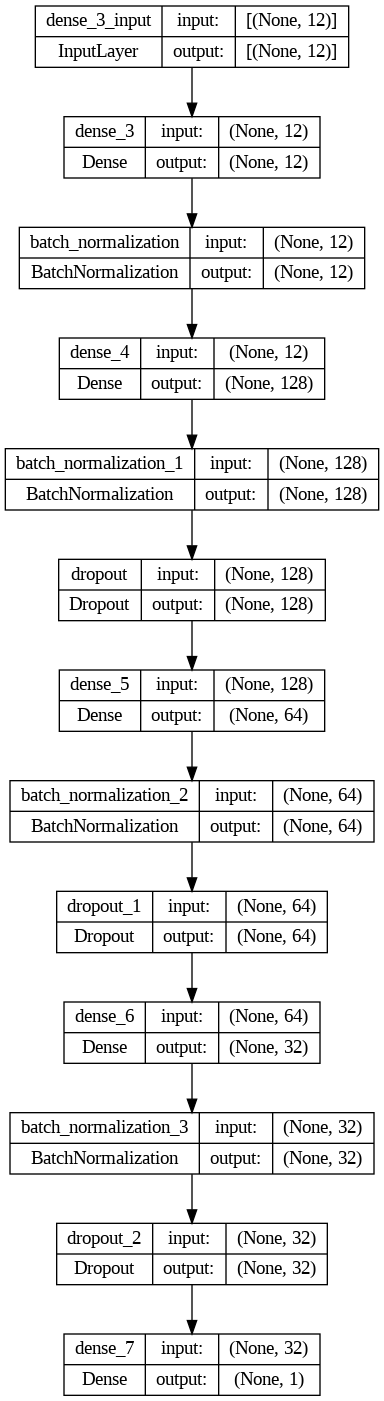

In [68]:
tf.keras.utils.plot_model(model_seq_tune, show_shapes=True)

* Dengan memvisualisasikan Plot ini dapat memberikan kita gambaran tentang struktur model, termasuk input layer, hidden layer, dan output layer, serta jumlah neuron pada setiap layer.
* plot menunjukkan input layer dengan jumlah neuron sebanyak input layer dari formula Hecht-Nielsen yang telah di set, kemudian dua hidden layer masing-masing dengan jumlah neuron 128 dan 64, dan output layer dengan satu neuron. Plot juga menunjukkan koneksi antara setiap layer dan informasi tambahan seperti jumlah parameter pada setiap layer.

 ## Functional API Default

In [69]:

input_layer = Input(shape=(inp,))
h1_layer = Dense(inp, activation='relu',kernel_initializer='GlorotUniform')(input_layer)
h2_layer = Dense(hid, activation='relu')(h1_layer)
output_layer = Dense(out, activation='sigmoid')(h2_layer)

model_func_def = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_func_def.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_func_def.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 180)               2340      
                                                                 
 dense_10 (Dense)            (None, 1)                 181       
                                                                 
Total params: 2,677
Trainable params: 2,677
Non-trainable params: 0
_________________________________________________________________


* Model ini menggunakan functional API pada TensorFlow Keras untuk membangun arsitektur modelnya.
* Model terdiri dari tiga layer yaitu input layer, hidden layer, dan output layer. Input layer dan hidden layer menggunakan fungsi aktivasi ReLU.
Output layer menggunakan fungsi aktivasi sigmoid.
* Model di-compile menggunakan binary_crossentropy loss function dan Adam optimizer, serta menggunakan BinaryAccuracy sebagai metrics untuk evaluasi model.
* Model summary menampilkan informasi tentang ukuran output dari masing-masing layer, jumlah parameter yang dapat diatur, serta informasi tentang jenis fungsi aktivasi dan jenis optimizer yang digunakan.

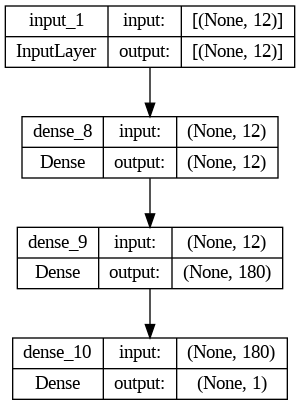

In [70]:
tf.keras.utils.plot_model(model_func_def, show_shapes=True)

## Functional API Tune

In [91]:
input_lyr = tf.keras.layers.Input(shape=(train_final.shape[1],))
layers1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='he_uniform',bias_initializer=Zeros())(input_lyr)
layers2 = tf.keras.layers.BatchNormalization()(layers1)
layers3 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers2)
layers4 = tf.keras.layers.BatchNormalization()(layers3)
layers5 = tf.keras.layers.Dropout(0.1)(layers4)
layers6 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers5)
layers7 = tf.keras.layers.BatchNormalization()(layers6)
layers8 = tf.keras.layers.Dropout(0.1)(layers7)
layers9 = tf.keras.layers.Dense(hid, kernel_initializer='he_uniform',activation='relu',bias_initializer=Zeros())(layers8)
layers10 = tf.keras.layers.BatchNormalization()(layers9)
layers11 = tf.keras.layers.Dropout(0.1)(layers10)
output = tf.keras.layers.Dense(out, kernel_initializer='he_uniform',activation='sigmoid',bias_initializer=Zeros())(layers11)

model_func_tune = tf.keras.models.Model(inputs=input_lyr,outputs=output)

# Compile
model_func_tune.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_func_tune.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_7 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_8 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 180)               0   

* model neural network dengan menggunakan API functional dari Keras. Model ini terdiri dari 8 lapisan, di antaranya 1 input layer, 2 hidden layer, 2 batch normalization layer, dan 2 dropout layer, serta 1 output layer.
* Input layer menerima input dengan shape yang sama dengan shape dari data yang digunakan untuk training. 
*
* Dropout layer digunakan sebagai teknik regularisasi dalam jaringan saraf tiruan. Tujuan dari teknik regularisasi adalah untuk menghindari overfitting pada model. Overfitting terjadi ketika model terlalu kompleks sehingga tidak dapat mengeneralisasi data yang belum pernah dilihat sebelumnya dengan baik. 
* Dropout layer dengan nilai 0.1 digunakan setelah dua lapisan tersembunyi (layers5 dan layers7). Hal ini bertujuan untuk mengurangi kompleksitas model dan mencegah overfitting pada model. Dengan melakukan dropout sebesar 0.1, 10% dari unit dalam lapisan sebelumnya secara acak dinonaktifkan selama pelatihan.

Referensi:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

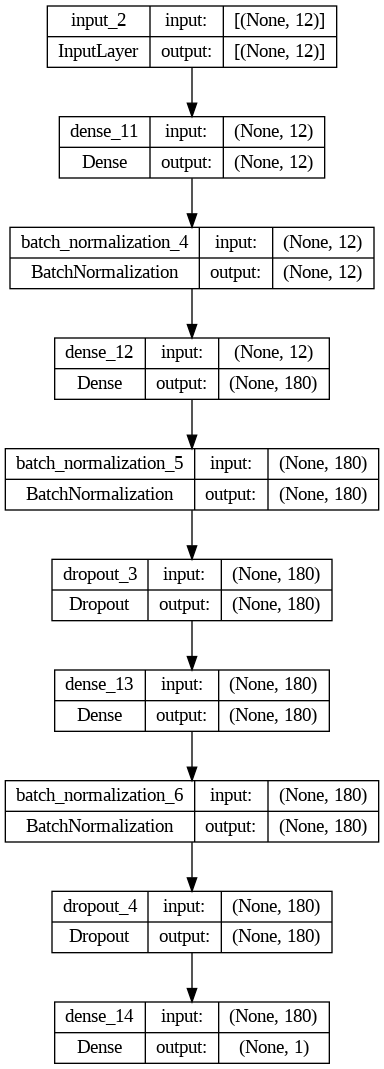

In [72]:
tf.keras.utils.plot_model(model_func_tune, show_shapes=True)

# VII. Model Training

In [73]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

* EarlyStopping: Objek ini akan menghentikan pelatihan model jika tidak ada perbaikan yang terlihat pada performa validasi (dalam hal ini, kita menggunakan metrik val_loss) selama beberapa epoch berturut-turut. Patience yang ditentukan di sini adalah 3, artinya jika performa tidak membaik selama 3 epoch berturut-turut, pelatihan akan dihentikan. restore_best_weights yang diset sebagai True berarti model akan menggunakan bobot terbaik yang telah disimpan selama pelatihan.
* ModelCheckpoint: Objek ini akan menyimpan model dengan performa validasi terbaik dalam file model_best.hdf5. monitor ditentukan sebagai val_loss, artinya model akan disimpan jika performa validasi lebih baik dari yang sebelumnya. save_best_only yang diset sebagai True berarti hanya model dengan performa terbaik yang akan disimpan, dan model-model sebelumnya yang performanya lebih buruk tidak akan disimpan.

# Sequential Default

In [74]:
%%time
history_seq_def = model_seq_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks1)

Epoch 1/50
1101/1101 [==============================] - 9s 6ms/step - loss: 0.3061 - accuracy: 0.8432 - val_loss: 0.2805 - val_accuracy: 0.8462
Epoch 2/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2791 - accuracy: 0.8481 - val_loss: 0.2772 - val_accuracy: 0.8464
Epoch 3/50
1101/1101 [==============================] - 7s 6ms/step - loss: 0.2754 - accuracy: 0.8484 - val_loss: 0.2718 - val_accuracy: 0.8469
Epoch 4/50
1101/1101 [==============================] - 4s 3ms/step - loss: 0.2690 - accuracy: 0.8486 - val_loss: 0.2644 - val_accuracy: 0.8469
Epoch 5/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2623 - accuracy: 0.8484 - val_loss: 0.2586 - val_accuracy: 0.8498
Epoch 6/50
1101/1101 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.8510 - val_loss: 0.2552 - val_accuracy: 0.8556
Epoch 7/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2558 - accuracy: 0.8563 - val_loss: 0.2540 - val_accuracy:

# Sequential Tune

In [75]:
%%time
history_seq_tune = model_seq_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks1)

Epoch 1/50
1101/1101 [==============================] - 8s 5ms/step - loss: 0.2909 - binary_accuracy: 0.8491 - val_loss: 0.2558 - val_binary_accuracy: 0.8462
Epoch 2/50
1101/1101 [==============================] - 5s 5ms/step - loss: 0.2657 - binary_accuracy: 0.8603 - val_loss: 0.2411 - val_binary_accuracy: 0.8624
Epoch 3/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2457 - binary_accuracy: 0.8773 - val_loss: 0.2255 - val_binary_accuracy: 0.8825
Epoch 4/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2380 - binary_accuracy: 0.8828 - val_loss: 0.2225 - val_binary_accuracy: 0.8980
Epoch 5/50
1101/1101 [==============================] - 4s 4ms/step - loss: 0.2309 - binary_accuracy: 0.8901 - val_loss: 0.2082 - val_binary_accuracy: 0.9108
Epoch 6/50
1101/1101 [==============================] - 6s 5ms/step - loss: 0.2192 - binary_accuracy: 0.9021 - val_loss: 0.1928 - val_binary_accuracy: 0.9217
Epoch 7/50
1101/1101 [==============================

Analisis: Berdasarkan hasil perbandingan antara model Sequential Default dengan Sequential Tune, model Improved terhadap model yang sudah di lakukan tune, terjadi peningkatan dalam beberapa hal yaitu:

* Default -> Tune Improve
* total time = 2min 23s -> 1min 37s (improve)
* loss = 0.1762 -> 0.1740 (improve)
* val loss = 0.427 -> 0.1658 (improve)
* binary accuracy = 0.9269 -> 0.9269 (akurasi sama)
* val_binary_accuracy = 0.9280 -> 0.9262 (terdapat penurunan tetapi sangat sedikit)
* it can be concluded that we managed to improve the model

dari hasil prediksi dapat disimpulkan bahwa berhasil menyempurnakan model dalam hal total time, loss, val loss.

# Functional API Default

In [76]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

* EarlyStopping: Objek ini akan menghentikan pelatihan model jika tidak ada perbaikan yang terlihat pada performa validasi (dalam hal ini, kita menggunakan metrik val_loss) selama beberapa epoch berturut-turut. Patience yang ditentukan di sini adalah 3, artinya jika performa tidak membaik selama 3 epoch berturut-turut, pelatihan akan dihentikan. restore_best_weights yang diset sebagai True berarti model akan menggunakan bobot terbaik yang telah disimpan selama pelatihan.
* ModelCheckpoint: Objek ini akan menyimpan model dengan performa validasi terbaik dalam file model_best.hdf5. monitor ditentukan sebagai val_loss, artinya model akan disimpan jika performa validasi lebih baik dari yang sebelumnya. save_best_only yang diset sebagai True berarti hanya model dengan performa terbaik yang akan disimpan, dan model-model sebelumnya yang performanya lebih buruk tidak akan disimpan.

In [77]:
%%time
history_func_def = model_func_def.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks2)

Epoch 1/50
1101/1101 [==============================] - 5s 3ms/step - loss: 0.3025 - accuracy: 0.8404 - val_loss: 0.2808 - val_accuracy: 0.8453
Epoch 2/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2766 - accuracy: 0.8532 - val_loss: 0.2734 - val_accuracy: 0.8535
Epoch 3/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2672 - accuracy: 0.8681 - val_loss: 0.2643 - val_accuracy: 0.8845
Epoch 4/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2604 - accuracy: 0.8807 - val_loss: 0.2589 - val_accuracy: 0.9181
Epoch 5/50
1101/1101 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.8911 - val_loss: 0.2555 - val_accuracy: 0.9221
Epoch 6/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2529 - accuracy: 0.8972 - val_loss: 0.2524 - val_accuracy: 0.9178
Epoch 7/50
1101/1101 [==============================] - 2s 2ms/step - loss: 0.2495 - accuracy: 0.8997 - val_loss: 0.2490 - val_accuracy:

In [92]:
%%time
history_func_tune = model_func_tune.fit(train_pipe, epochs=50, validation_data=val_pipe, callbacks=callbacks2)

Epoch 1/50
1101/1101 [==============================] - 13s 9ms/step - loss: 0.2699 - accuracy: 0.8814 - val_loss: 0.2114 - val_accuracy: 0.9127
Epoch 2/50
1101/1101 [==============================] - 12s 11ms/step - loss: 0.2143 - accuracy: 0.9125 - val_loss: 0.1825 - val_accuracy: 0.9231
Epoch 3/50
1101/1101 [==============================] - 9s 9ms/step - loss: 0.1960 - accuracy: 0.9203 - val_loss: 0.1734 - val_accuracy: 0.9296
Epoch 4/50
1101/1101 [==============================] - 11s 10ms/step - loss: 0.1872 - accuracy: 0.9235 - val_loss: 0.1671 - val_accuracy: 0.9274
Epoch 5/50
1101/1101 [==============================] - 8s 7ms/step - loss: 0.1815 - accuracy: 0.9251 - val_loss: 0.1655 - val_accuracy: 0.9304
Epoch 6/50
1101/1101 [==============================] - 9s 8ms/step - loss: 0.1767 - accuracy: 0.9276 - val_loss: 0.1607 - val_accuracy: 0.9326
Epoch 7/50
1101/1101 [==============================] - 9s 8ms/step - loss: 0.1739 - accuracy: 0.9286 - val_loss: 0.1618 - val_accu

Analisis: Berdasarkan hasil perbandingan antara model Funtcional Default dengan Funtcional Tune, model Improved terhadap model yang sudah di lakukan tune, terjadi peningkatan dalam beberapa hal yaitu:

* Default -> Tune Improve
* total time = 2min 23s -> 2min 50s (hampir sama)
* loss = 0.1762 -> 0.1740 (improve)
* val loss = 0.427 -> 0.161 (improve)
* binary accuracy = 0.9269 -> 0.9377 (improve)
* val_accuracy= 0.9313 -> 0.9337 (improve)

dari hasil prediksi dapat disimpulkan bahwa berhasil menyempurnakan model dalam hal loss, val loss binary accyracy dan val accuracy

# VII. Model Evaluation


## Sequential Default

In [93]:
history_seq_def_df = pd.DataFrame(history_seq_def.history)

<Axes: >

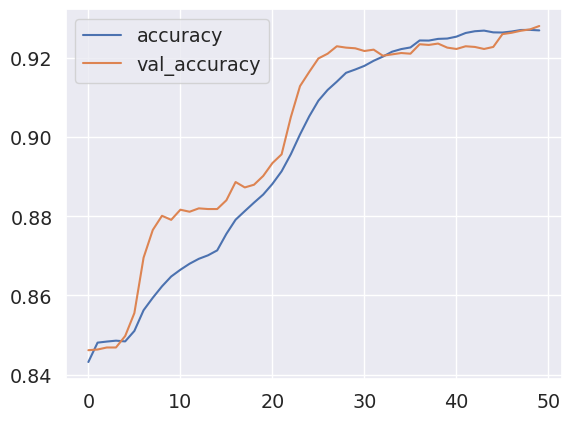

In [94]:
history_seq_def_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

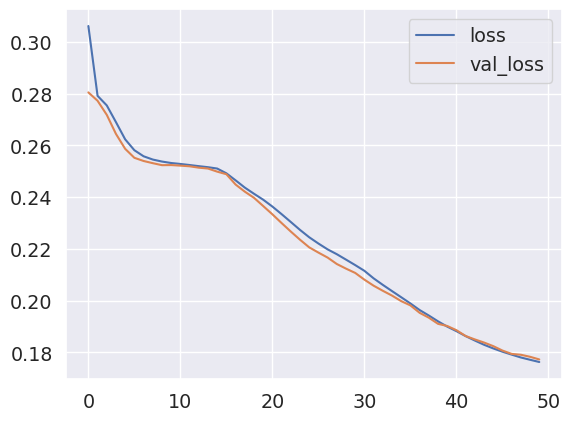

In [95]:
history_seq_def_df[['loss', 'val_loss']].plot()

In [96]:
y_pred_seq_def = model_seq_def.predict(test_final)
y_pred_seq_def = np.where(y_pred_seq_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_def))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3364
           1       0.94      0.93      0.93      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

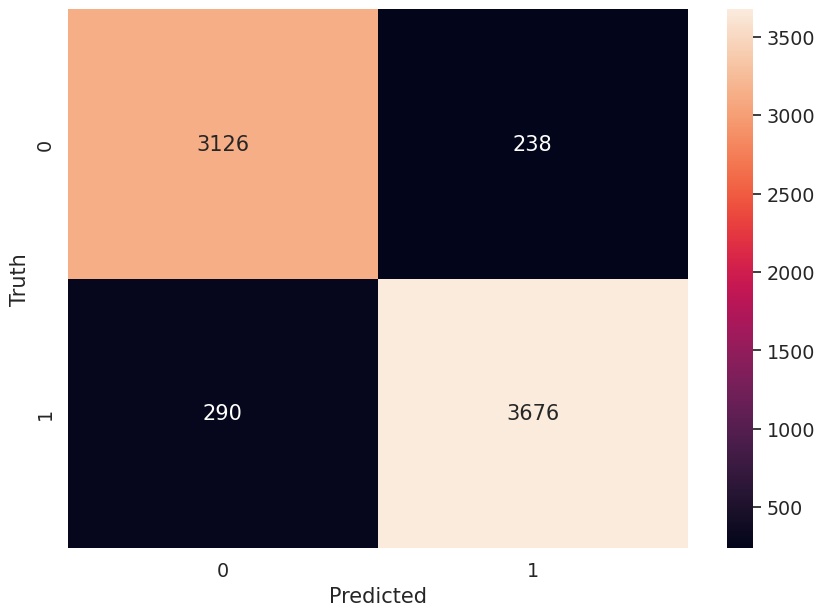

In [97]:
cm_seq_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

     0.93      0.92

Analisis : Sequential Default

Berdasarkan ke 2 lineplot dapat di katakan goodfit karena antara train dan val akurasi nilainya berdekatan begitupun dengan 'loss', 'val_loss'.
Berdasarkan laporan klasifikasi, f1-skor untuk label 1 cenderung memiliki nilai yang lebih baik (0.94) dibandingkan dengan f1-skor untuk label 0 (0,92).

# Sequential Tune

In [98]:
history_seq_tune_df = pd.DataFrame(history_seq_tune.history)

<Axes: >

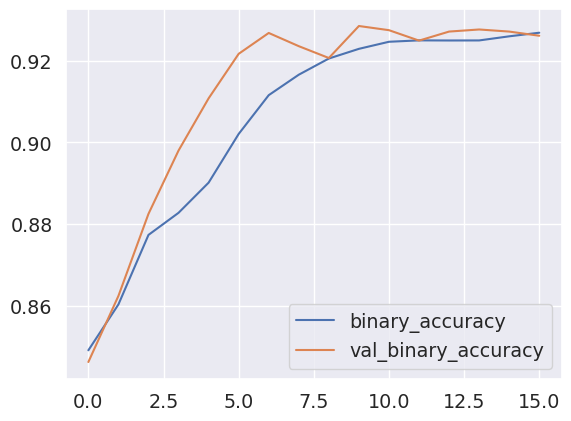

In [99]:
history_seq_tune_df[['binary_accuracy', 'val_binary_accuracy']].plot()

<Axes: >

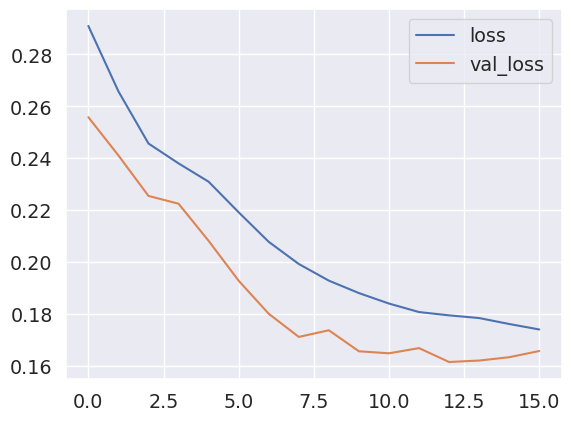

In [100]:
history_seq_tune_df[['loss', 'val_loss']].plot()

In [101]:
y_pred_seq_tune = model_seq_tune.predict(test_final)
y_pred_seq_tune = np.where(y_pred_seq_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_seq_tune))

230/230 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3364
           1       0.93      0.95      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

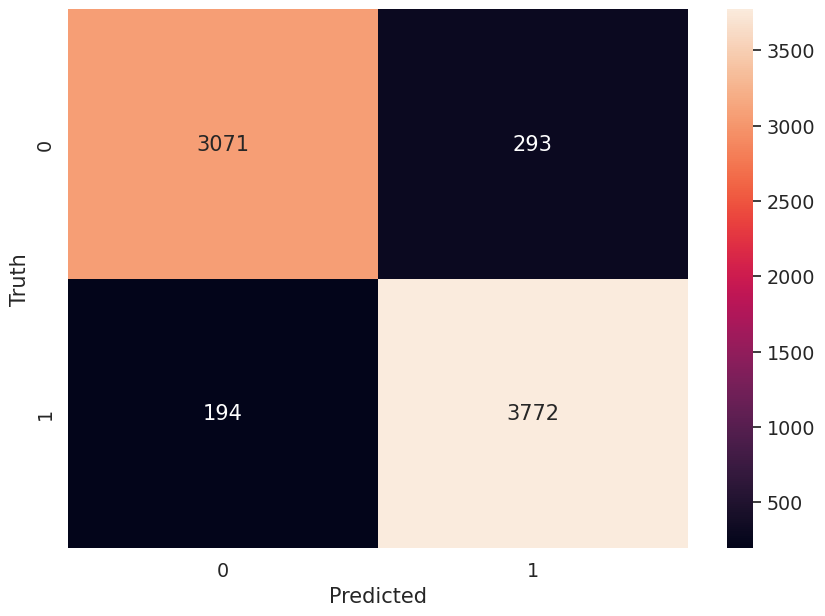

In [102]:
cm_seq_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_seq_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_seq_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analisis : Sequential Tune

Berdasarkan ke 2 lineplot dapat di katakan goodfit karena antara train dan val akurasi nilainya berdekatan dan untuk 'loss', 'val_loss' sedikit overfit.
Berdasarkan laporan klasifikasi, Skor f1-skor untuk label 0 cenderung memiliki nilai yang lebih baik (0.94) dibandingkan dengan f1-skor untuk label 1 (0,93).

 # Functional API Default

In [103]:
history_func_def_df = pd.DataFrame(history_func_def.history)

<Axes: >

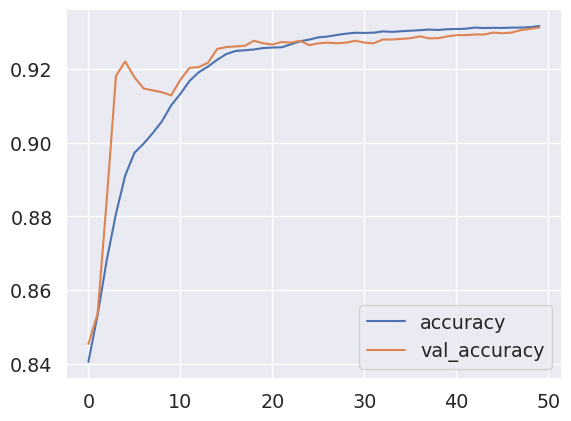

In [104]:
history_func_def_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

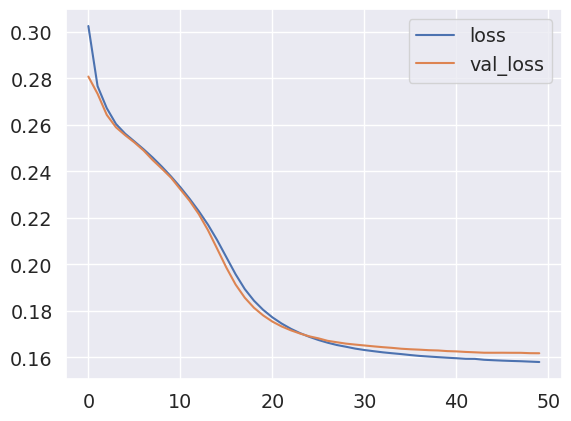

In [105]:
history_func_def_df[['loss', 'val_loss']].plot()

In [106]:
y_pred_func_def = model_func_def.predict(test_final)
y_pred_func_def = np.where(y_pred_func_def >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_def))

230/230 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3364
           1       0.95      0.93      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

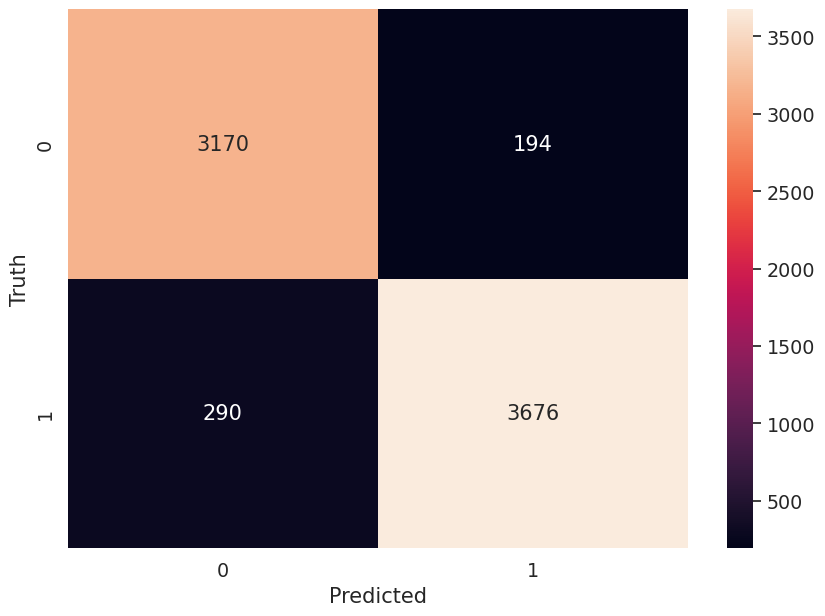

In [107]:
cm_func_def = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_def)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_def, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analisis : Functional Default

Berdasarkan ke 2 lineplot dapat di katakan goodfit karena antara train dan val akurasi nilainya berdekatan begitupun dengan 'loss', 'val_loss'.
Berdasarkan laporan klasifikasi, f1-skor untuk label 1 cenderung memiliki nilai yang lebih baik (0.94) dibandingkan dengan f1-skor untuk label 0 (0,93).

# Functional API Tune

In [108]:
history_func_tune_df = pd.DataFrame(history_func_tune.history)

<Axes: >

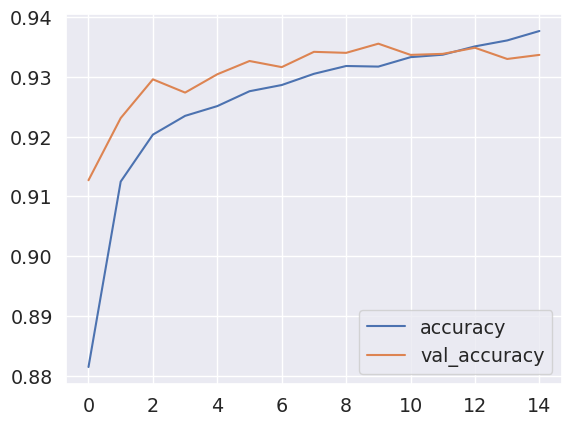

In [109]:
history_func_tune_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

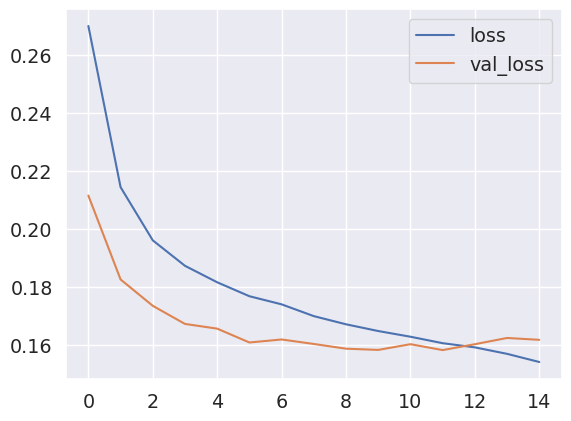

In [110]:
history_func_tune_df[['loss', 'val_loss']].plot()

In [111]:
y_pred_func_tune = model_func_tune.predict(test_final)
y_pred_func_tune = np.where(y_pred_func_tune >=0.5, 1, 0)
print(classification_report(y_test, y_pred_func_tune))

230/230 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3364
           1       0.92      0.96      0.94      3966

    accuracy                           0.93      7330
   macro avg       0.93      0.93      0.93      7330
weighted avg       0.93      0.93      0.93      7330



Text(87.25, 0.5, 'Truth')

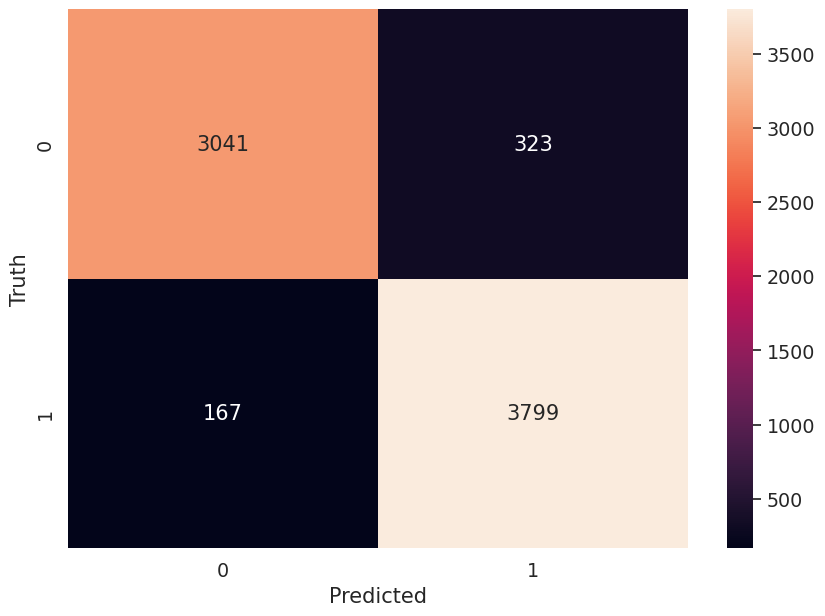

In [112]:
cm_func_tune = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_func_tune)
plt.figure(figsize = (10,7))
sns.heatmap(cm_func_tune, annot=True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Analisis : Functional Tune

Berdasarkan ke 2 lineplot dapat di katakan goodfit pada patahan 12 karena antara train dan val akurasi nilainya berdekatan begitupun dengan 'loss', 'val_loss'.
Berdasarkan laporan klasifikasi, f1-skor untuk label 1 cenderung memiliki nilai yang lebih baik (0.94) dibandingkan dengan f1-skor untuk label 0 (0,93).

# VIII. Model Saving

In [113]:
with open('full_pipeline.pkl', 'wb') as file_1:
  joblib.dump(full_pipeline, file_1)

In [115]:
model_func_tune.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_7 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_8 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 180)               0   

In [116]:
# Freeze Model
model_func_tune.trainable = False
model_func_tune.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_15 (Dense)            (None, 12)                156       
                                                                 
 batch_normalization_7 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 180)               2340      
                                                                 
 batch_normalization_8 (Batc  (None, 180)              720       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 180)               0   

In [114]:
#save ann model Functional API
model_func_tune.save('model_func_tune.h5')

# IX. Inference

**Pada Nootbook yang lain** 

# X. Conclusion

## Model analysis 
Dalam prediksi Model analysis menggunakan model sequential dan Funcional dengan masing masing model di lakukan tune. 

* Dalam menentukan menghitung jumlah neuron pada hidden layer dengan menggunakan formula Hecht-Nielsen yang disebut sebagai "the rule of thumb" atau aturan praktis.
Penentuan jumlah neuron di hidden layer

Nh=Ns(α∗(Ni+No)) 

𝑁𝑖 = number of input neurons.

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10.

**Sequential API**
* Berdasarkan hasil perbandingan antara model Sequential Default dengan Sequential Tune, model Improved terhadap model yang sudah di lakukan tune, terjadi peningkatan dalam beberapa hal yaitu:

  * Default -> Tune Improve
  * total time = 2min 23s -> 1min 37s (improve)
  * loss = 0.1762 -> 0.1740 (improve)
  * val loss = 0.427 -> 0.1658 (improve)
  * binary accuracy = 0.9269 -> 0.9269 (akurasi sama)
  * val_binary_accuracy = 0.9280 -> 0.9262 (terdapat penurunan tetapi sangat sedikit)

dari hasil prediksi dapat disimpulkan bahwa berhasil menyempurnakan model dalam hal total time, loss, val loss.

**Funtional API**
* Berdasarkan hasil perbandingan antara model Funtcional Default dengan Funtcional Tune, model Improved terhadap model yang sudah di lakukan tune, terjadi peningkatan dalam beberapa hal yaitu:

* Default -> Tune Improve
* total time = 2min 23s -> 2min 50s (hampir sama)
* loss = 0.1762 -> 0.1740 (improve)
* val loss = 0.427 -> 0.161 (improve)
* binary accuracy = 0.9269 -> 0.9377 (improve)
* val_accuracy= 0.9313 -> 0.9337 (improve)

dari hasil prediksi dapat disimpulkan bahwa berhasil menyempurnakan model dalam hal loss, val loss binary accyracy dan val accuracy.

* parameter yang di gunakan untuk model sequential tune adalah 
  * activation='relu': Activation function adalah fungsi matematis yang diterapkan pada setiap neuron di dalam layer pada jaringan saraf tiruan.
  * kernel_initializer='he_uniform': Parameter ini adalah parameter untuk menginisialisasi bobot atau kernel pada layer. Parameter ini digunakan untuk memberikan nilai awal atau 'awal' pada bobot yang disesuaikan dengan karakteristik data.
  * bias_initializer='Zeros': Parameter ini digunakan untuk menginisialisasi bias pada setiap neuron dalam layer. 'Zeros' adalah metode inisialisasi yang sederhana dan sering digunakan untuk menginisialisasi bias dengan nilai nol. Hal ini dilakukan untuk memberikan nilai awal pada bias sehingga proses pembelajaran dapat berjalan secara lebih efektif.
  * BatchNormalization(): Batch normalization adalah suatu teknik untuk meningkatkan kecepatan dan stabilitas pembelajaran jaringan saraf dengan mengnormalisasi nilai-nilai input pada setiap batch data. Teknik ini digunakan untuk menghindari masalah seperti vanishing gradient dan overfitting pada jaringan saraf.
  * Dropout layer digunakan sebagai teknik regularisasi dalam jaringan saraf tiruan. Tujuan dari teknik regularisasi adalah untuk menghindari overfitting pada model. Overfitting terjadi ketika model terlalu kompleks sehingga tidak dapat mengeneralisasi data yang belum pernah dilihat sebelumnya dengan baik. 
* Dropout layer dengan nilai 0.1 digunakan setelah dua lapisan tersembunyi (pada layer). Hal ini bertujuan untuk mengurangi kompleksitas model dan mencegah overfitting pada model. Dengan melakukan dropout sebesar 0.1, 10% dari unit dalam lapisan sebelumnya secara acak dinonaktifkan selama pelatihan.

* Referensi:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
* Referensi: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw





## Overall Analysis

* dari hasil prediksi dapat disimpulkan bahwa berhasil menyempurnakan model dengan accuracy pada Sequential tune: 92% dan Funtional Tune: 93%
* Model dapat memprediksi dengan sangat baik.
* Model masih dapat ditingkatkan karena beberapa faktor seperti:
    * bisa menambahkan Paramater penting pada HyperParameter Tuning sehingga dapat menghasilkan prediksi yang lebih optimal.

## Business Conclusion

* Dapat dilihat dari EDA di atas bahwa rata-rata nilai transaksi pelanggan cenderung meningkat seiring dengan waktu, mulai dari tahun 2015 hingga 2017. Hal ini menunjukkan bahwa pelanggan menjadi semakin aktif dalam melakukan transaksi dan mungkin semakin loyal terhadap bisnis. Ini dapat menjadi sinyal positif bagi bisnis untuk mempertahankan pelanggan yang ada dan menarik pelanggan baru dengan menawarkan layanan atau produk yang menarik.

* Mayoritas pelanggan memberikan feedback "tidak puas" atau "netral" terhadap layanan perusahaan seperti (kualitas yang buruk,sangat banyaknya iklan dan lain-lain). Hal ini perlu diperhatikan oleh perusahaan untuk memperbaiki kualitas layanan agar dapat meningkatkan kepuasan pelanggan.

* Dalam hal ini di sarankan berfokus pada customer satisfaction: Untuk menjaga kepuasan pelanggan, perusahaan perlu memastikan bahwa produk dan layanan yang ditawarkan sesuai dengan kebutuhan dan harapan pelanggan. Dalam kondisi di mana jumlah customer churn dan tidak churn seimbang, perusahaan masih perlu memperhatikan kualitas produk atau layanan, memastikan customer retention, meningkatkan kepuasan pelanggan, dan meningkatkan loyalitas pelanggan untuk menjaga pertumbuhan bisnis yang sehat.
